# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis

# Import Warning
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


#### Some functions which will be used later on

In [3]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# Define the folder path where the PDF should be saved
output_folder = r"C:\Users\Lenovo\ML_Tutorial_Python\UpGrad AIML Asignments\Linear-Regression-main\Assignment\Delivery_Starter"

# Ensure the folder exists (optional, in case you want to create it if missing)
#os.makedirs(output_folder, exist_ok=True)

# Define the full path for the PDF file
pdf_filename = os.path.join(output_folder, "Susom_Bikash_Mukherjee_LR_Delivery_Time_Analysis_Plots.pdf")

# Create the PdfPages object to save multiple plots
pdf_pages = PdfPages(pdf_filename)

def save_plot_to_pdf(comment=None):
    global pdf_pages
    
    if comment:
        print(f" {comment}")  # Print the comment for clarity before saving
        
    pdf_pages.savefig()  # Save the current figure to the PDF
    print("Plot saved to PDF!")
    
# Call pdf_pages.close() when all plots are added to save the file properly
def finalize_pdf():
    global pdf_pages
    pdf_pages.close()
    print(f" PDF file '{pdf_filename}' has been created successfully!")


def save_text_to_pdf(text):
    # Function to save a text-based conclusion/remark as a separate page in the PDF
    global pdf_pages

    # Create a blank figure for text
    fig, ax = plt.subplots(figsize=(10, 3))  # Standard A4 page size
    ax.set_axis_off()  # Hide axes
    
    # Display the text
    ax.text(0.1, 0.9, "Conclusion/Remarks:", fontsize=16, fontweight="bold", transform=ax.transAxes)
    ax.text(0.1, 0.75, text, fontsize=12, transform=ax.transAxes, verticalalignment="top", wrap=True)

    # Save the figure with text to PDF
    pdf_pages.savefig(fig)
    print("Text remark saved to PDF!")

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [4]:
# Importing the file porter_data_1.csv
df_del_time = pd.read_csv("porter_data_1.csv")

# Check the head of the dataset
df_del_time.head()

market_id       created_at actual_delivery_time  store_primary_category  \
0          1   2/6/2015 22:24       2/6/2015 23:11                       4   
1          2  2/10/2015 21:49      2/10/2015 22:33                      46   
2          2   2/16/2015 0:11       2/16/2015 1:06                      36   
3          1   2/12/2015 3:36       2/12/2015 4:35                      38   
4          1   1/27/2015 2:12       1/27/2015 2:58                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0               1            4      3441                   4             557   
1               2            1      1900                   1            1400   
2               3            4      4771                   3             820   
3               1            1      1525                   1            1525   
4               1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                     33                  14   
1            1400                      1                   2   
2            1604                      8                   6   
3            1525                      5                   6   
4            2195                      5                   5   

   total_outstanding_orders  distance  
0                        21     34.44  
1                         2     27.60  
2                        18     11.56  
3                         8     31.80  
4                         7      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [5]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

# making sure it doesn't fail even if there are bad/malformed dates, and it will set invalid parses to NaT (Not a Time)
df_del_time['created_at'] = pd.to_datetime(df_del_time['created_at'], errors='coerce')
df_del_time['actual_delivery_time'] = pd.to_datetime(df_del_time['actual_delivery_time'], errors='coerce')

In [6]:
# Checking data type
df_del_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  int64         
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  int64         
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  int64         
 11  total_busy_dashers        175777 non-null  int64         
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [7]:
# Convert categorical features to category type

print( df_del_time["market_id"].nunique() )
print( df_del_time["order_protocol"].nunique() )
print( df_del_time["store_primary_category"].nunique())
print( df_del_time["total_items"].nunique())
print( df_del_time["num_distinct_items"].nunique())

# Convert categorical columns to 'category' dtype
df_del_time['market_id'] = df_del_time['market_id'].astype('category')
df_del_time['store_primary_category'] = df_del_time['store_primary_category'].astype('category')
df_del_time['order_protocol'] = df_del_time['order_protocol'].astype('category')

#df_del_time['distance'] = df_del_time['distance'].astype(int)


df_del_time.shape

6
7
73
54
20


(175777, 14)

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [8]:
# Calculate time taken in minutes
df_del_time['time_taken'] = df_del_time['actual_delivery_time'] - df_del_time['created_at'] 

# Convert to total seconds
#df_del_time['time_taken'] = df_del_time['time_taken'].dt.total_seconds()

# Then format back into HH:MM:SS
#df_del_time['time_taken'] = pd.to_datetime(df_del_time['time_taken'], unit='s').dt.strftime('%H:%M:%S')
df_del_time['time_taken_minutes'] = df_del_time['time_taken'].dt.total_seconds()/ 60   # Converting into minute
df_del_time['time_taken_minutes'] = df_del_time['time_taken_minutes'].astype(int)       # I don't want decimal

df_del_time.head()

market_id          created_at actual_delivery_time store_primary_category  \
0         1 2015-02-06 22:24:00  2015-02-06 23:11:00                      4   
1         2 2015-02-10 21:49:00  2015-02-10 22:33:00                     46   
2         2 2015-02-16 00:11:00  2015-02-16 01:06:00                     36   
3         1 2015-02-12 03:36:00  2015-02-12 04:35:00                     38   
4         1 2015-01-27 02:12:00  2015-01-27 02:58:00                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0              1            4      3441                   4             557   
1              2            1      1900                   1            1400   
2              3            4      4771                   3             820   
3              1            1      1525                   1            1525   
4              1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                     33                  14   
1            1400                      1                   2   
2            1604                      8                   6   
3            1525                      5                   6   
4            2195                      5                   5   

   total_outstanding_orders  distance      time_taken  time_taken_minutes  
0                        21     34.44 0 days 00:47:00                  47  
1                         2     27.60 0 days 00:44:00                  44  
2                        18     11.56 0 days 00:55:00                  55  
3                         8     31.80 0 days 00:59:00                  59  
4                         7      8.20 0 days 00:46:00                  46

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [9]:
##################################################################
# Extract the hour and day of week from the 'created_at' timestamp
##################################################################
# 1. Extract weekday name
df_del_time['day_of_week'] = df_del_time['created_at'].dt.day_name()

# 2. Extract time in 24-hour format (HH:MM)

# Step 1: If needed, format as string first
df_del_time['created_at_time'] = df_del_time['created_at'].dt.strftime('%H:%M')

# Step 2: Convert string back to datetime64[ns], using a dummy date (like today's date)
df_del_time['created_at_time'] = pd.to_datetime(df_del_time['created_at_time'], format='%H:%M')


########################################## May be used in analysis later on ################################
# 3. Extract year (like 2025)
df_del_time['year'] = df_del_time['created_at'].dt.year


# 4. Extract month name (like 'January', 'February', etc.)
#df_del_time['month'] = df_del_time['created_at'].dt.month_name()  # it will return month name so not using
df_del_time['month'] = df_del_time['created_at'].dt.month          # it will return month as 1 to 12


# 5. Extract just the date part (YYYY-MM-DD)
df_del_time['date'] = df_del_time['created_at'].dt.day

############################################
# Create a categorical feature 'isWeekend'
############################################
df_del_time['isWeekend'] = df_del_time['day_of_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

# Chanding the Day name to number
# Create a mapping dictionary
day_to_num = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}

# Replace day_of_week using the map
df_del_time['day_of_week'] = df_del_time['day_of_week'].map(day_to_num)


df_del_time.head()


market_id          created_at actual_delivery_time store_primary_category  \
0         1 2015-02-06 22:24:00  2015-02-06 23:11:00                      4   
1         2 2015-02-10 21:49:00  2015-02-10 22:33:00                     46   
2         2 2015-02-16 00:11:00  2015-02-16 01:06:00                     36   
3         1 2015-02-12 03:36:00  2015-02-12 04:35:00                     38   
4         1 2015-01-27 02:12:00  2015-01-27 02:58:00                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0              1            4      3441                   4             557   
1              2            1      1900                   1            1400   
2              3            4      4771                   3             820   
3              1            1      1525                   1            1525   
4              1            2      3620                   2            1425   

   max_item_price  ...  total_outstanding_orders  distance      time_taken  \
0            1239  ...                        21     34.44 0 days 00:47:00   
1            1400  ...                         2     27.60 0 days 00:44:00   
2            1604  ...                        18     11.56 0 days 00:55:00   
3            1525  ...                         8     31.80 0 days 00:59:00   
4            2195  ...                         7      8.20 0 days 00:46:00   

   time_taken_minutes day_of_week     created_at_time  year month  date  \
0                  47           5 1900-01-01 22:24:00  2015     2     6   
1                  44           2 1900-01-01 21:49:00  2015     2    10   
2                  55           1 1900-01-01 00:11:00  2015     2    16   
3                  59           4 1900-01-01 03:36:00  2015     2    12   
4                  46           2 1900-01-01 02:12:00  2015     1    27   

   isWeekend  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 22 columns]

#### Adding columns for better analysis

In [10]:
# Create new column: Hour bin (1 to 24)
df_del_time['created_hr_within'] = df_del_time['created_at_time'].dt.hour + 1
df_del_time['100X_distance'] = (df_del_time['distance'] * 100).astype(int)

df_del_time.head()

market_id          created_at actual_delivery_time store_primary_category  \
0         1 2015-02-06 22:24:00  2015-02-06 23:11:00                      4   
1         2 2015-02-10 21:49:00  2015-02-10 22:33:00                     46   
2         2 2015-02-16 00:11:00  2015-02-16 01:06:00                     36   
3         1 2015-02-12 03:36:00  2015-02-12 04:35:00                     38   
4         1 2015-01-27 02:12:00  2015-01-27 02:58:00                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0              1            4      3441                   4             557   
1              2            1      1900                   1            1400   
2              3            4      4771                   3             820   
3              1            1      1525                   1            1525   
4              1            2      3620                   2            1425   

   max_item_price  ...      time_taken  time_taken_minutes  day_of_week  \
0            1239  ... 0 days 00:47:00                  47            5   
1            1400  ... 0 days 00:44:00                  44            2   
2            1604  ... 0 days 00:55:00                  55            1   
3            1525  ... 0 days 00:59:00                  59            4   
4            2195  ... 0 days 00:46:00                  46            2   

      created_at_time  year  month  date isWeekend  created_hr_within  \
0 1900-01-01 22:24:00  2015      2     6         0                 23   
1 1900-01-01 21:49:00  2015      2    10         0                 22   
2 1900-01-01 00:11:00  2015      2    16         0                  1   
3 1900-01-01 03:36:00  2015      2    12         0                  4   
4 1900-01-01 02:12:00  2015      1    27         0                  3   

   100X_distance  
0           3444  
1           2760  
2           1156  
3           3180  
4            819  

[5 rows x 24 columns]

#### Applying One Hot Encoding to Categorical Features

In [11]:
print( df_del_time["market_id"].nunique() )
print( df_del_time["order_protocol"].nunique() )
print( df_del_time["store_primary_category"].nunique())
print( df_del_time["day_of_week"].nunique())
print( df_del_time["isWeekend"].nunique())
print( df_del_time["total_items"].nunique())
print( df_del_time["num_distinct_items"].nunique())

6
7
73
7
2
54
20


In [12]:
import pandas as pd

# Columns to one-hot encode
#cat_cols = ['market_id', 'order_protocol', 'store_primary_category', 'day_of_week', 'isWeekend', 'total_items', 'num_distinct_items']
cat_cols = ['market_id', 'order_protocol', 'day_of_week', 'isWeekend']

# Perform one-hot encoding
df_del_time_encoded = pd.get_dummies(df_del_time, columns=cat_cols, drop_first=True)

# Identify only the newly created one-hot columns (they contain category indicators)
one_hot_cols = df_del_time_encoded.columns.difference(df_del_time.columns)

# Convert those columns to integers (0 or 1)
df_del_time_encoded[one_hot_cols] = df_del_time_encoded[one_hot_cols].astype(int)


In [13]:
df_del_time_encoded.head()

created_at actual_delivery_time store_primary_category  \
0 2015-02-06 22:24:00  2015-02-06 23:11:00                      4   
1 2015-02-10 21:49:00  2015-02-10 22:33:00                     46   
2 2015-02-16 00:11:00  2015-02-16 01:06:00                     36   
3 2015-02-12 03:36:00  2015-02-12 04:35:00                     38   
4 2015-01-27 02:12:00  2015-01-27 02:58:00                     38   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            4      4771                   3             820            1604   
3            1      1525                   1            1525            1525   
4            2      3620                   2            1425            2195   

   total_onshift_dashers  total_busy_dashers  ...  order_protocol_5  \
0                     33                  14  ...                 0   
1                      1                   2  ...                 0   
2                      8                   6  ...                 0   
3                      5                   6  ...                 0   
4                      5                   5  ...                 0   

   order_protocol_6 order_protocol_7  day_of_week_1 day_of_week_2  \
0                 0                0              0             0   
1                 0                0              0             1   
2                 0                0              1             0   
3                 0                0              0             0   
4                 0                0              0             1   

   day_of_week_3  day_of_week_4  day_of_week_5  day_of_week_6  isWeekend_1  
0              0              0              1              0            0  
1              0              0              0              0            0  
2              0              0              0              0            0  
3              0              1              0              0            0  
4              0              0              0              0            0  

[5 rows x 38 columns]

In [14]:
# Drop unnecessary columns
drop_columns = ['created_at' ,'actual_delivery_time','time_taken','created_at_time','distance','created_at_time','year','time_taken' ]  # Not removing day_of_week right now, will do some analysis.


# dropping and updating the data frame

#df_del_time = df_del_time.drop(columns=drop_columns)
df_del_time_encoded.drop(columns=drop_columns, inplace=True)

df_del_time.drop(columns=drop_columns, inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [15]:
# Define target variable (y) and features (X)

# 1. DataFrame without 'time_taken'
X_df_del_time = df_del_time_encoded.drop(columns=['time_taken_minutes'])

# 2. DataFrame with only 'time_taken'
y_df_del_time = df_del_time_encoded[['time_taken_minutes']]

In [16]:
X_df_del_time.shape

(175777, 31)

In [17]:
y_df_del_time.shape

(175777, 1)

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [18]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
X_train, X_test, y_train, y_test, = train_test_split(X_df_del_time, y_df_del_time, test_size= 0.2, random_state = 100)
#X_train, X_test = train_test_split(X_df_del_time, test_size= 0.2, random_state = 100)

X_train_unscaled = X_train.copy()  # keeting an unscaled copy
y_train_unscaled = X_train.copy()  # keeting an unscaled copy

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


#### For This we will use the Data set before Splitting and Encoding i.e df_del_time

In [19]:
df_del_time.head(5)

market_id store_primary_category order_protocol  total_items  subtotal  \
0         1                      4              1            4      3441   
1         2                     46              2            1      1900   
2         2                     36              3            4      4771   
3         1                     38              1            1      1525   
4         1                     38              1            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                     33   
1                   1            1400            1400                      1   
2                   3             820            1604                      8   
3                   1            1525            1525                      5   
4                   2            1425            2195                      5   

   total_busy_dashers  total_outstanding_orders  time_taken_minutes  \
0                  14                        21                  47   
1                   2                         2                  44   
2                   6                        18                  55   
3                   6                         8                  59   
4                   5                         7                  46   

   day_of_week  month  date  isWeekend  created_hr_within  100X_distance  
0            5      2     6          0                 23           3444  
1            2      2    10          0                 22           2760  
2            1      2    16          0                  1           1156  
3            4      2    12          0                  4           3180  
4            2      1    27          0                  3            819

In [20]:
# Define numerical and categorical columns for easy EDA and data manipulation
num_vars = ['subtotal', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
            'total_outstanding_orders','total_items','num_distinct_items',
            'store_primary_category','market_id','order_protocol','day_of_week','100X_distance']

# Categorical variables = all columns not in num_vars or drop_columns
#cat_vars = [col for col in df_del_time.columns if col not in num_vars]
cat_vars = [col for col in df_del_time.columns if col not in num_vars + drop_columns]
cat_vars

['time_taken_minutes', 'month', 'date', 'isWeekend', 'created_hr_within']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [21]:
def univariate_plot (df, comment, is_data_scaled='N', num_cols=None, cat_cols=None):
    """
    Plots:
    - Histogram for numeric columns if data is scaled
    - Countplot for categorical columns if data is not scaled

    Parameters:
    - df: pandas DataFrame
    - comment: text added to the saved plot description
    - For numeric : is_data_scaled ='Y' then  numeric data -> kdeplot , 'N' then  numeric data -> histplot
    - For categorycal : countplot
    - num_cols: list of numeric column names
    - cat_cols: list of categorical column names
    """
    if is_data_scaled == 'Y' and num_cols:
        for col in num_cols:
            plt.figure(figsize=(12, 4))
            sns.kdeplot(df[col], fill=True)
            plt.title(f'KDE Plot of {col}')
            plt.tight_layout()
            save_plot_to_pdf(f"{comment} - KDE Plot of {col}")
            plt.show()

    elif is_data_scaled == 'N' and num_cols:
        for col in num_cols:
            plt.figure(figsize=(12, 4))
            sns.histplot(df[col], bins=30, kde=False)
            plt.title(f'Histogram of {col}')
            plt.tight_layout()
            save_plot_to_pdf(f"{comment} - Histogram of {col}")
            plt.show()

    # Count plots for categorical columns
    if cat_cols:
        for col in cat_cols:
            plt.figure(figsize=(12, 4))
            sns.countplot(x=col, data=df)
            plt.title(f'Countplot of {col}')
            plt.xticks(rotation=90)
            plt.tight_layout()
            save_plot_to_pdf(f"{comment} - Countplot of {col}")
            plt.show()



 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot - Histogram of subtotal
Plot saved to PDF!


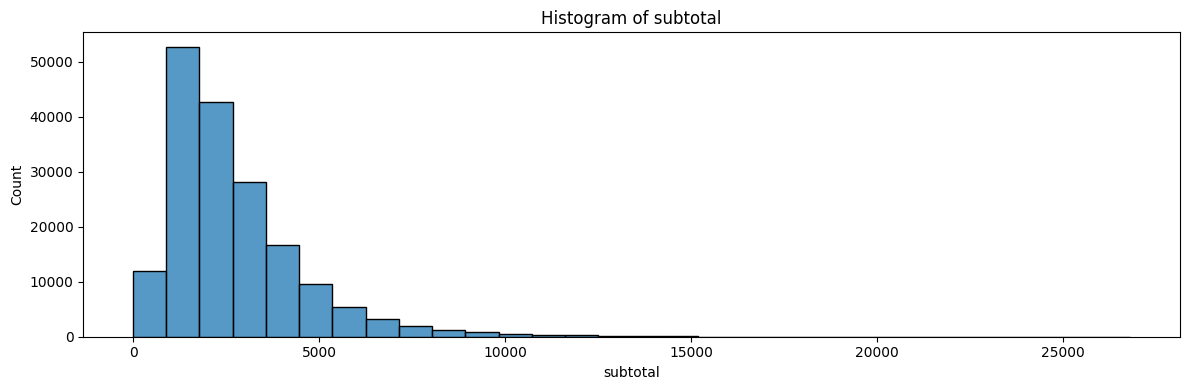

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot - Histogram of min_item_price
Plot saved to PDF!


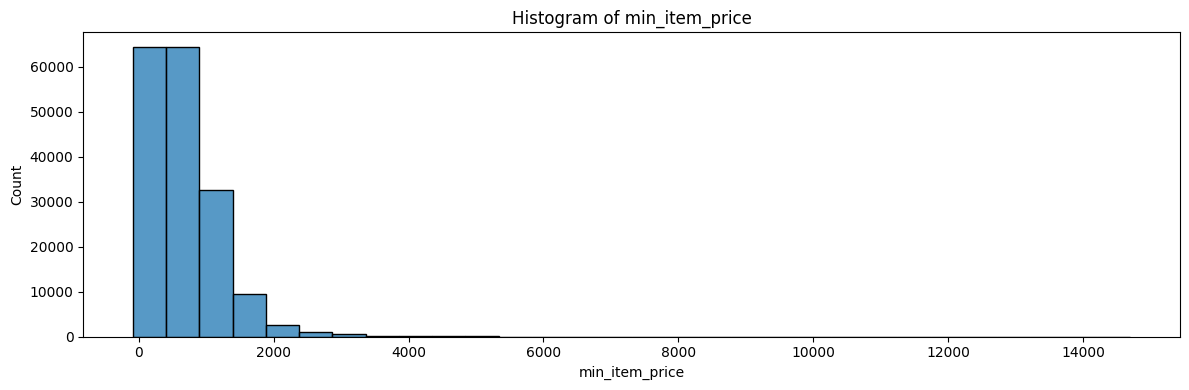

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot - Histogram of max_item_price
Plot saved to PDF!


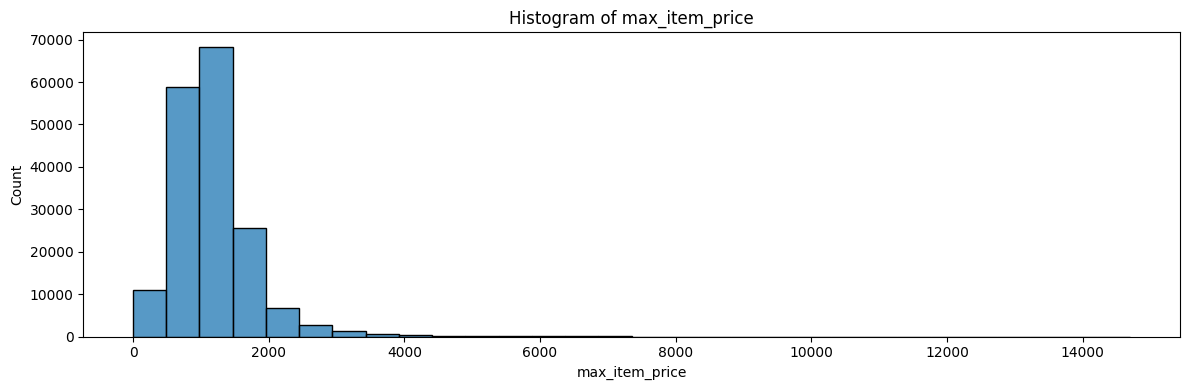

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot - Histogram of total_onshift_dashers
Plot saved to PDF!


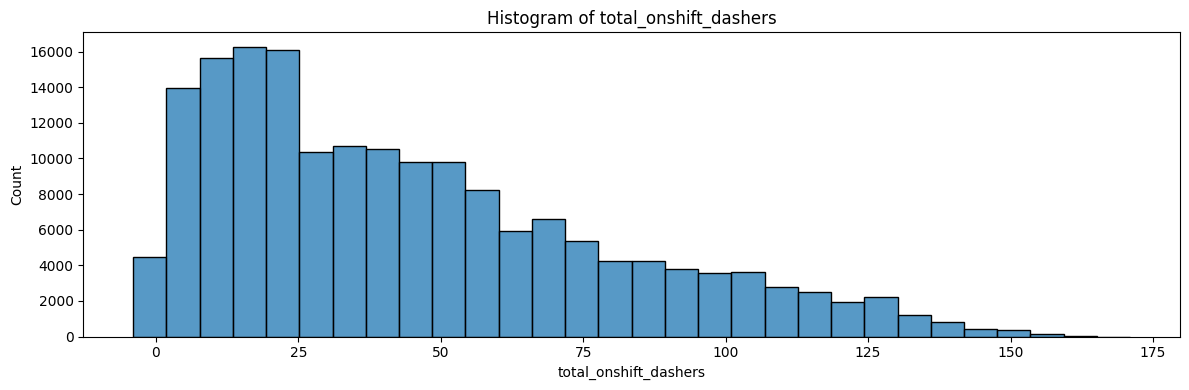

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot - Histogram of total_busy_dashers
Plot saved to PDF!


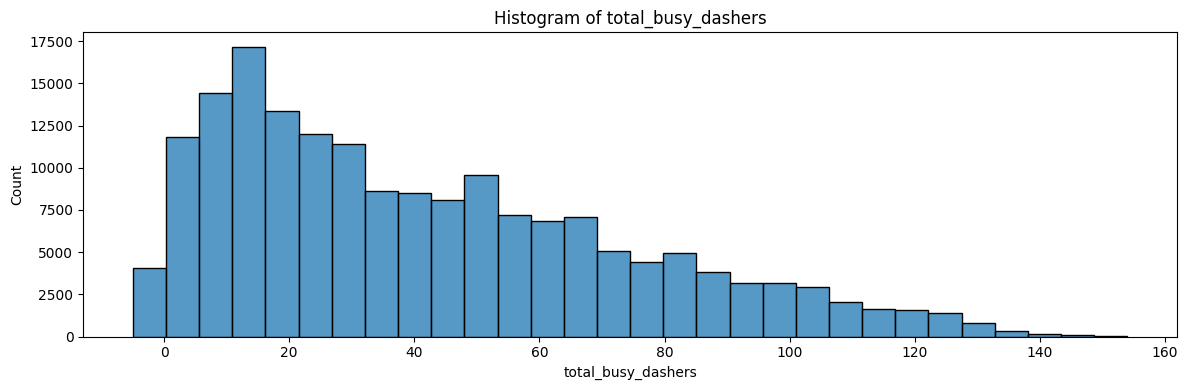

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot - Histogram of total_outstanding_orders
Plot saved to PDF!


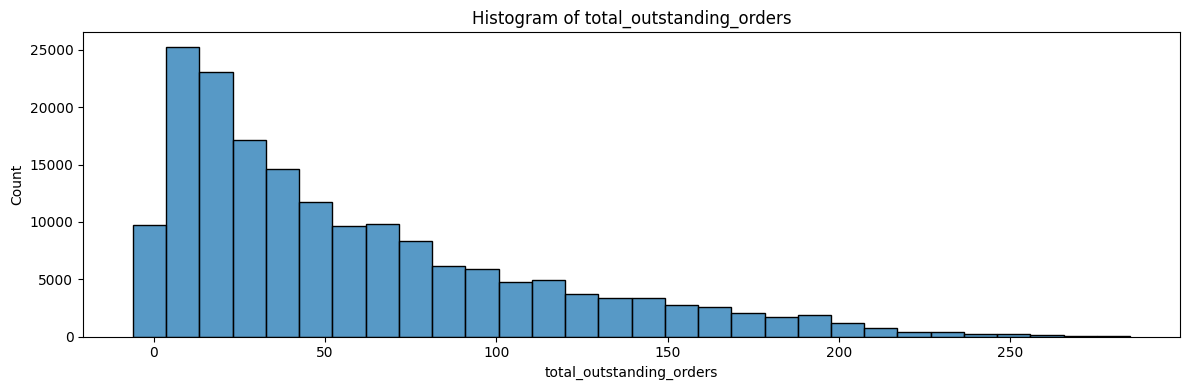

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot - Histogram of total_items
Plot saved to PDF!


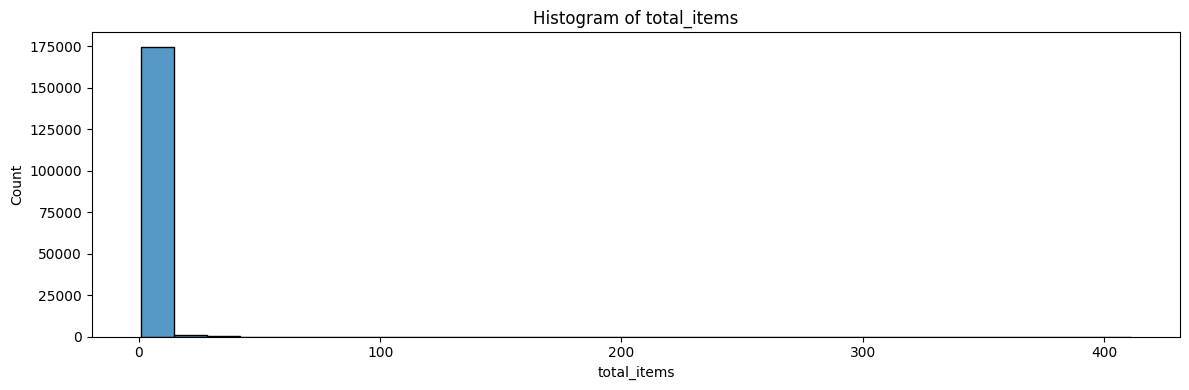

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot - Histogram of num_distinct_items
Plot saved to PDF!


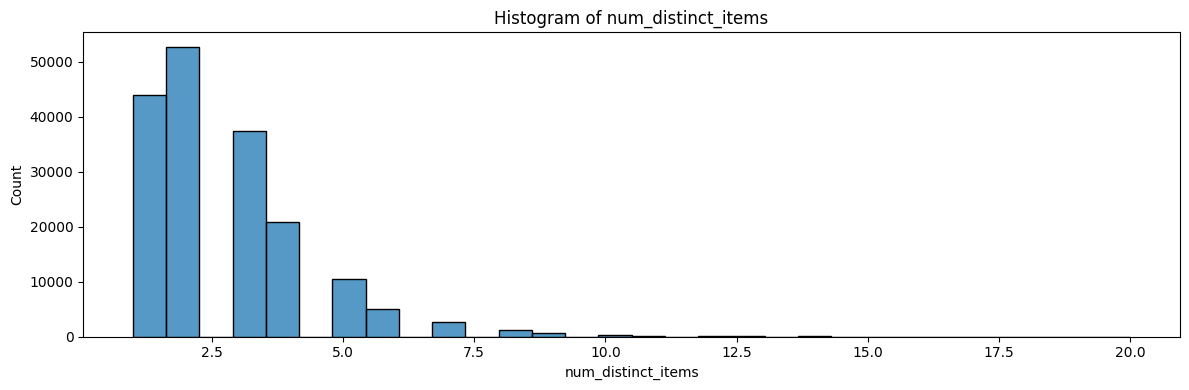

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot - Histogram of store_primary_category
Plot saved to PDF!


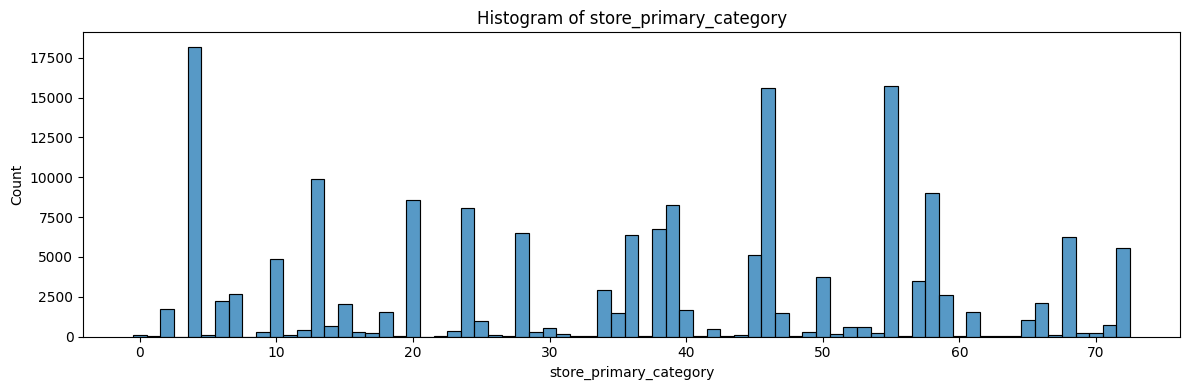

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot - Histogram of market_id
Plot saved to PDF!


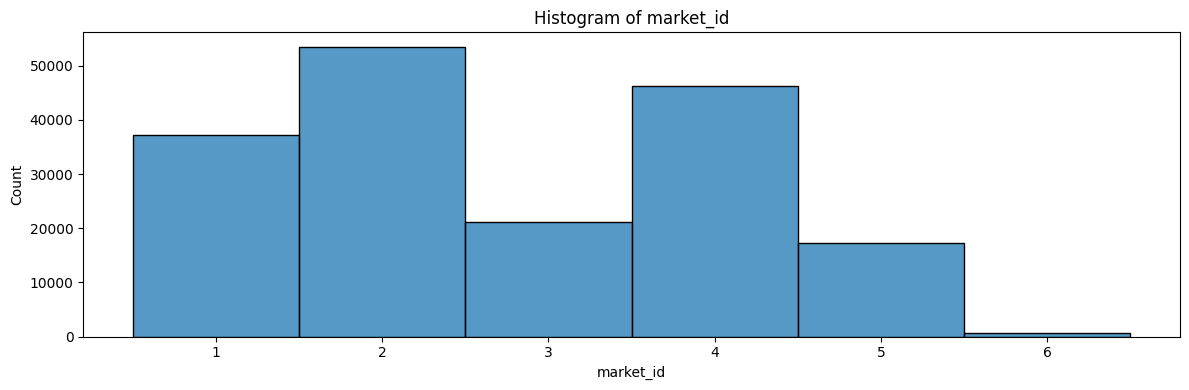

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot - Histogram of order_protocol
Plot saved to PDF!


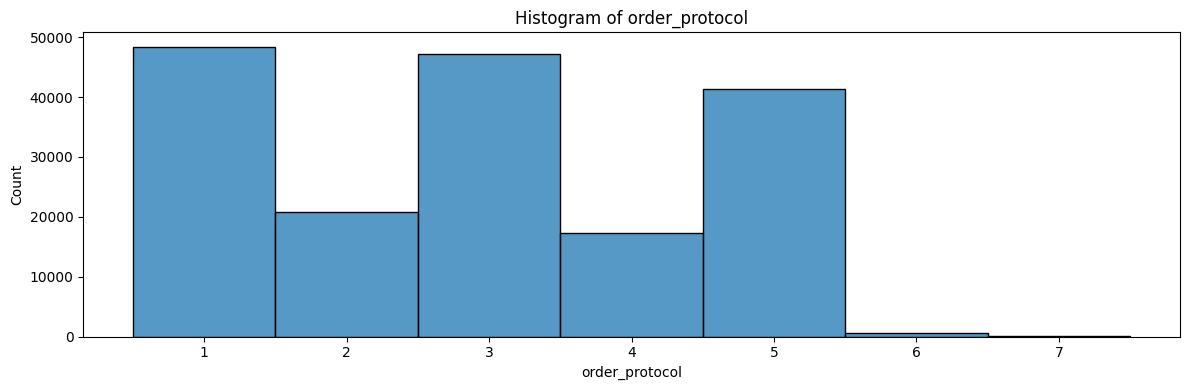

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot - Histogram of day_of_week
Plot saved to PDF!


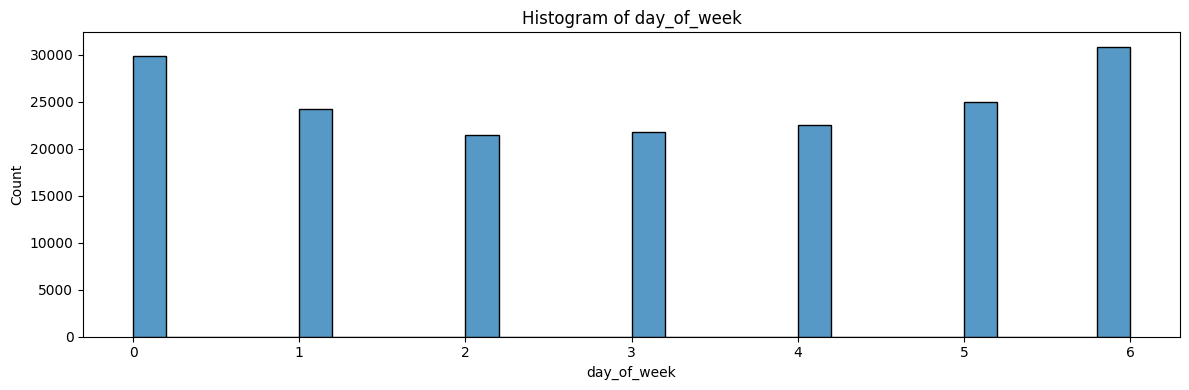

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot - Histogram of 100X_distance
Plot saved to PDF!


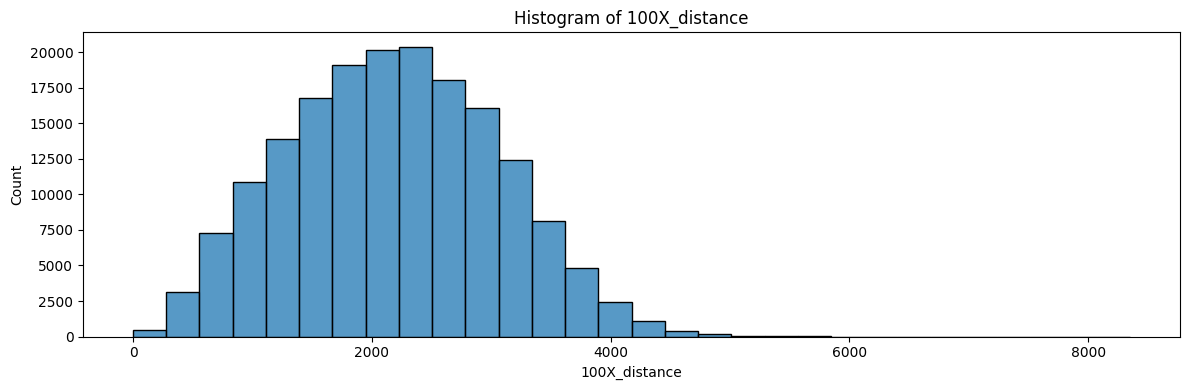

In [22]:
univariate_plot(df_del_time,"3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot",'N',num_vars,None)

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot - Countplot of time_taken_minutes
Plot saved to PDF!


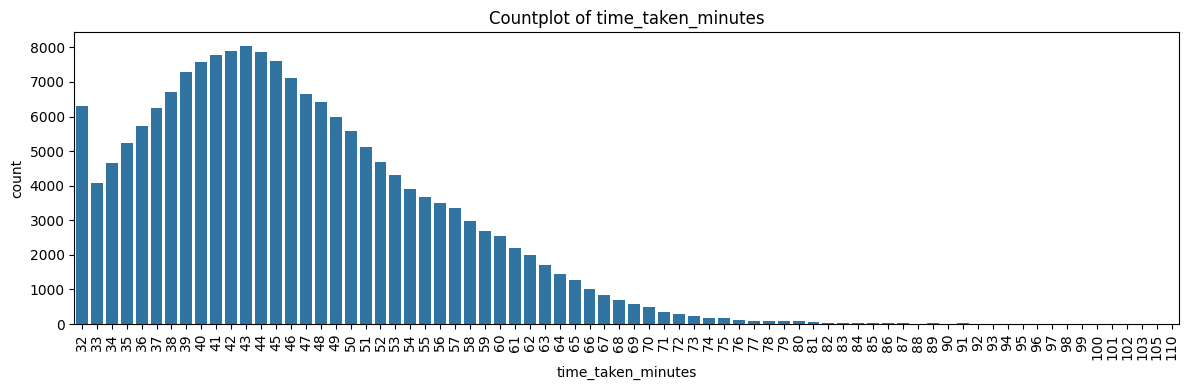

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot - Countplot of month
Plot saved to PDF!


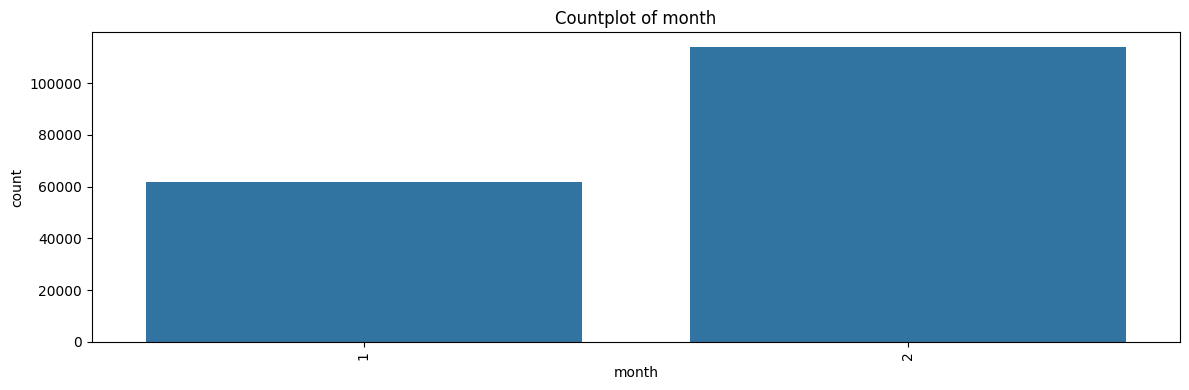

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot - Countplot of date
Plot saved to PDF!


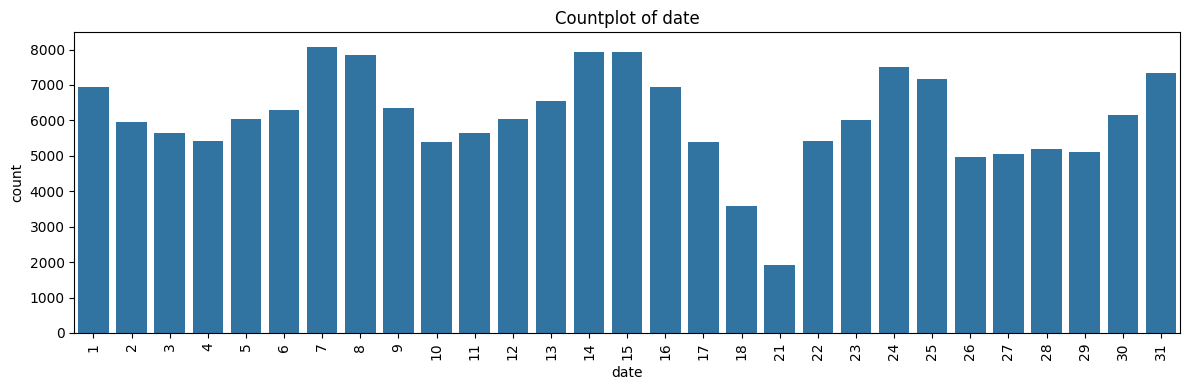

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot - Countplot of isWeekend
Plot saved to PDF!


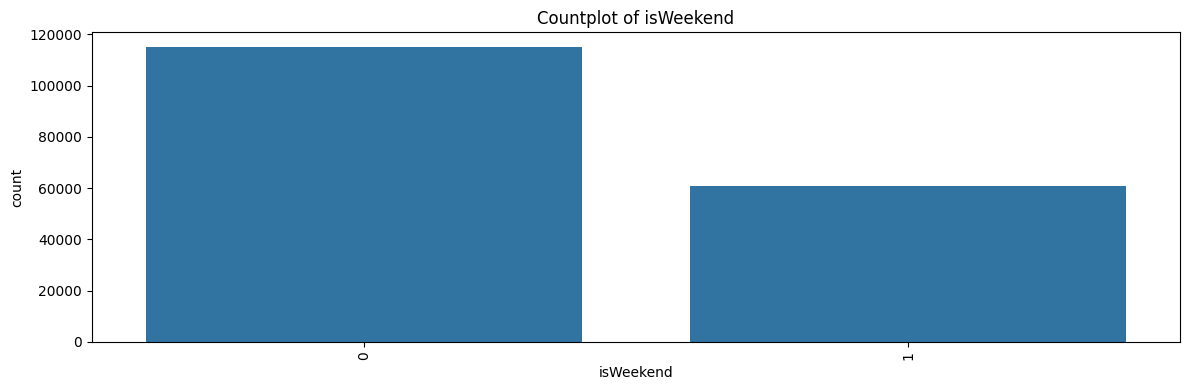

 3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot - Countplot of created_hr_within
Plot saved to PDF!


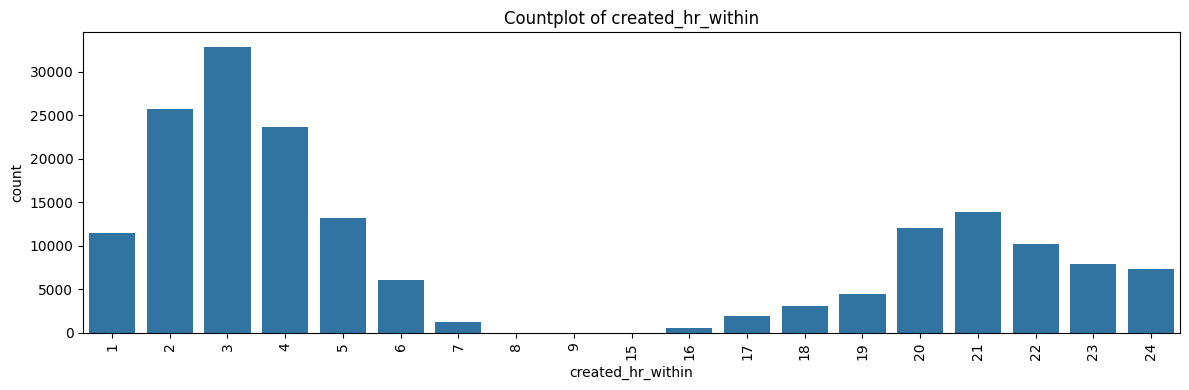

In [23]:
# Distribution of categorical columns

univariate_plot(df_del_time,"3.1.1 Showing distribution for numerical values Only in Histogram,Box and KDE Plot",'N', None,cat_vars)

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [24]:
# Distribution of time_taken

def plot_target_distribution(df, target, comment):
    plt.figure(figsize=(10, 5))
    sns.histplot(
        data=df,
        x=target,
        bins=50,
        kde=True,
        hue="isWeekend",
        multiple="dodge"
    )
    plt.title("Distribution of Delivery Time by Weekend vs Weekday")
    plt.xlabel("Time Taken (minutes)")
    plt.ylabel("Density")
    plt.tight_layout()
    
    # Save plot to PDF
    save_plot_to_pdf(f"{comment} - Countplot of time_taken_minutes")
    
    plt.show()


 3.1.3 Visualise the distribution of the target variable to understand its spread and any skewness - Countplot of time_taken_minutes
Plot saved to PDF!


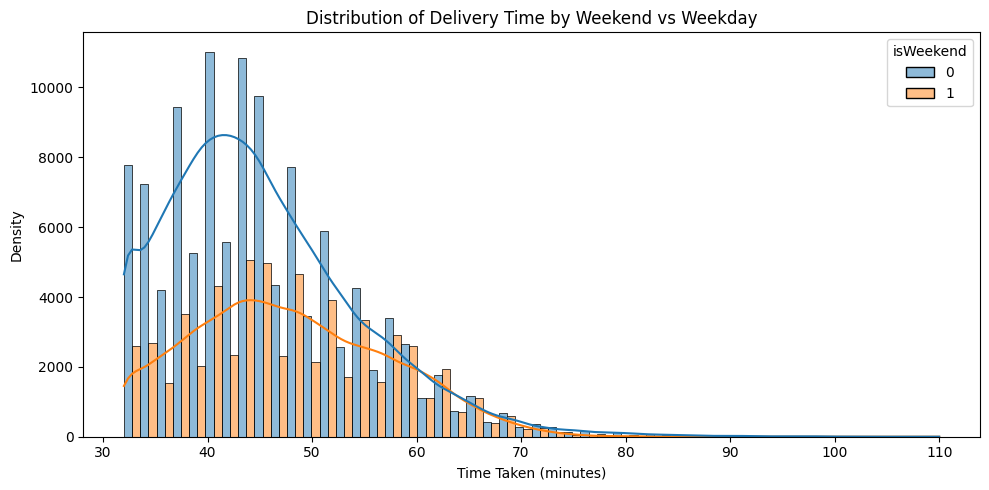

In [25]:
plot_target_distribution(df_del_time,'time_taken_minutes', "3.1.3 Visualise the distribution of the target variable to understand its spread and any skewness")

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [26]:
# Scatter plot to visualise the relationship between time_taken and other features
def bivariate_plot(df, target, comment):
    for col in df.columns:
        if col != target:
            plt.figure(figsize=(8, 4))
            sns.scatterplot(x=df[col], y=df[target], alpha=0.5)
            plt.xlabel(col)
            plt.ylabel(target)
            plt.title(f'{target} vs {col}')
            plt.tight_layout()
            
            # Save plot to PDF
            save_plot_to_pdf(f"{comment} - Countplot of time_taken_minutes")
            plt.show()
            

 3.2.1 Scatter plots for important numerical and categorical features to observe how they relate to time_taken - Countplot of time_taken_minutes
Plot saved to PDF!


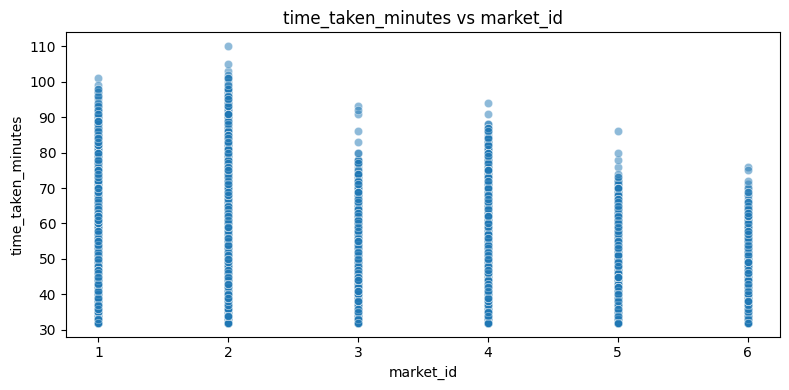

 3.2.1 Scatter plots for important numerical and categorical features to observe how they relate to time_taken - Countplot of time_taken_minutes
Plot saved to PDF!


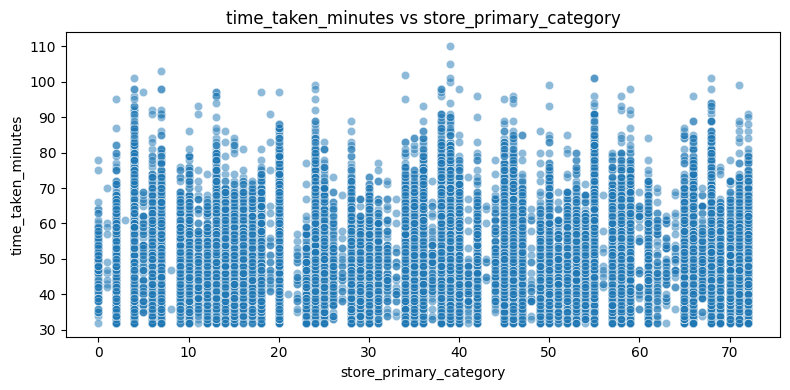

 3.2.1 Scatter plots for important numerical and categorical features to observe how they relate to time_taken - Countplot of time_taken_minutes
Plot saved to PDF!


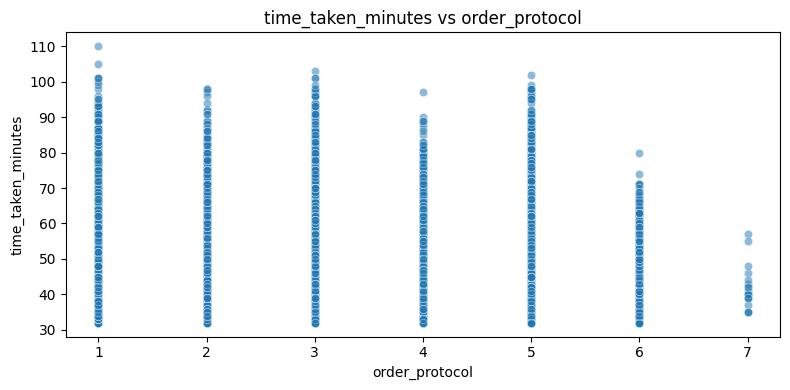

 3.2.1 Scatter plots for important numerical and categorical features to observe how they relate to time_taken - Countplot of time_taken_minutes
Plot saved to PDF!


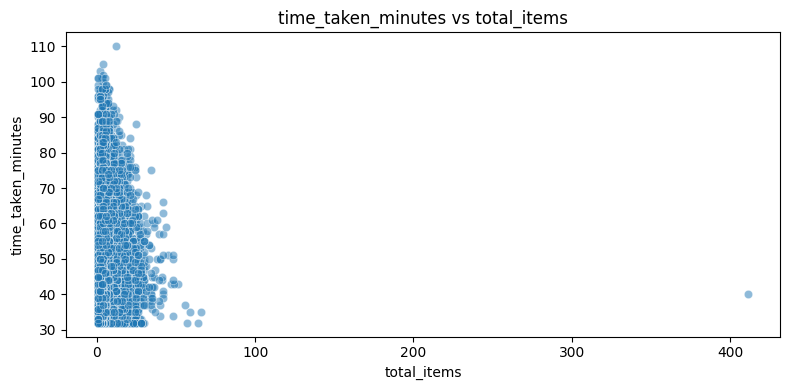

 3.2.1 Scatter plots for important numerical and categorical features to observe how they relate to time_taken - Countplot of time_taken_minutes
Plot saved to PDF!


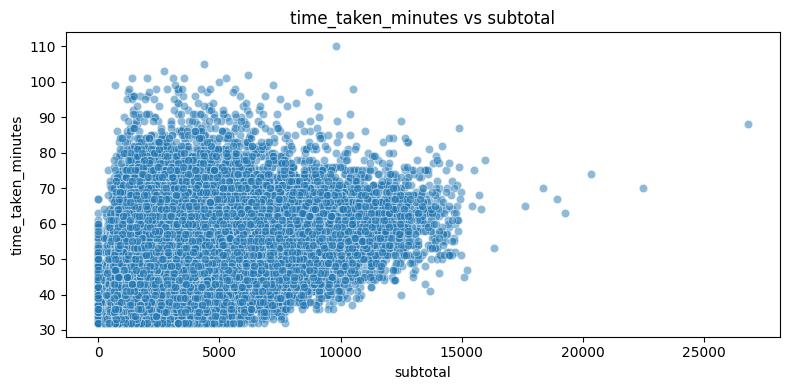

 3.2.1 Scatter plots for important numerical and categorical features to observe how they relate to time_taken - Countplot of time_taken_minutes
Plot saved to PDF!


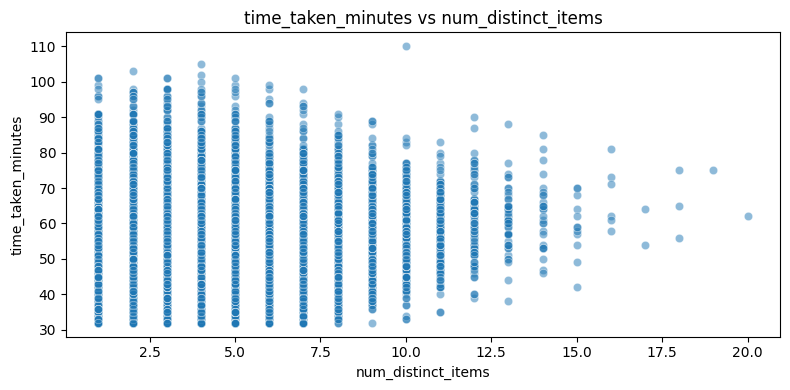

 3.2.1 Scatter plots for important numerical and categorical features to observe how they relate to time_taken - Countplot of time_taken_minutes
Plot saved to PDF!


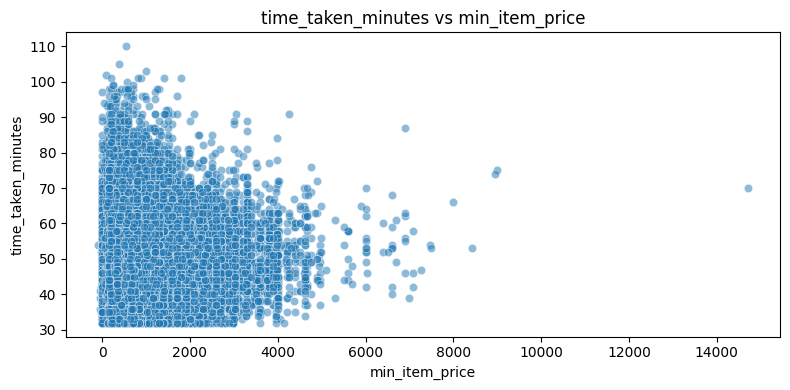

 3.2.1 Scatter plots for important numerical and categorical features to observe how they relate to time_taken - Countplot of time_taken_minutes
Plot saved to PDF!


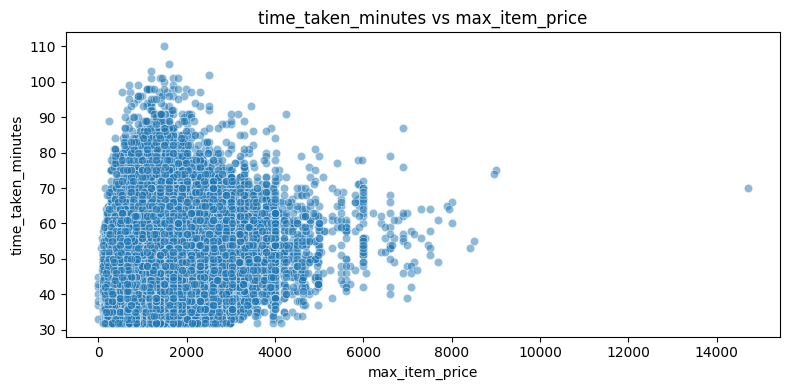

 3.2.1 Scatter plots for important numerical and categorical features to observe how they relate to time_taken - Countplot of time_taken_minutes
Plot saved to PDF!


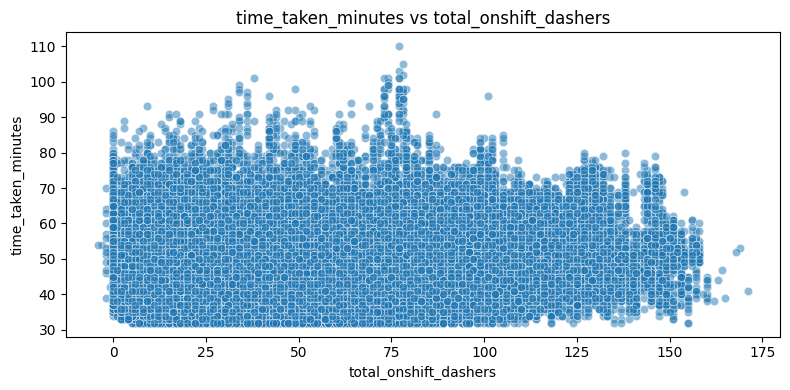

 3.2.1 Scatter plots for important numerical and categorical features to observe how they relate to time_taken - Countplot of time_taken_minutes
Plot saved to PDF!


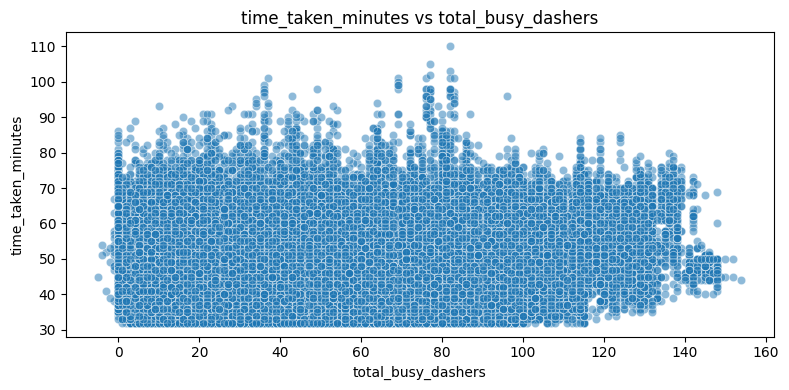

 3.2.1 Scatter plots for important numerical and categorical features to observe how they relate to time_taken - Countplot of time_taken_minutes
Plot saved to PDF!


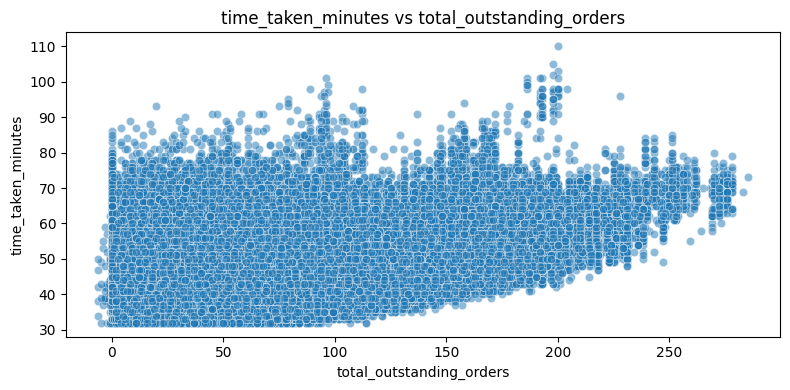

 3.2.1 Scatter plots for important numerical and categorical features to observe how they relate to time_taken - Countplot of time_taken_minutes
Plot saved to PDF!


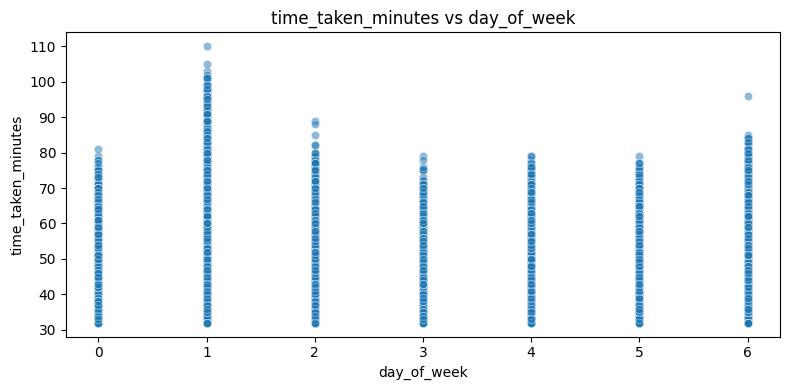

 3.2.1 Scatter plots for important numerical and categorical features to observe how they relate to time_taken - Countplot of time_taken_minutes
Plot saved to PDF!


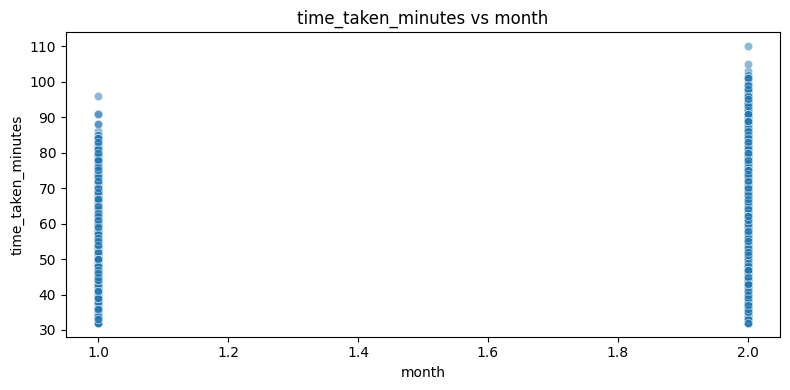

 3.2.1 Scatter plots for important numerical and categorical features to observe how they relate to time_taken - Countplot of time_taken_minutes
Plot saved to PDF!


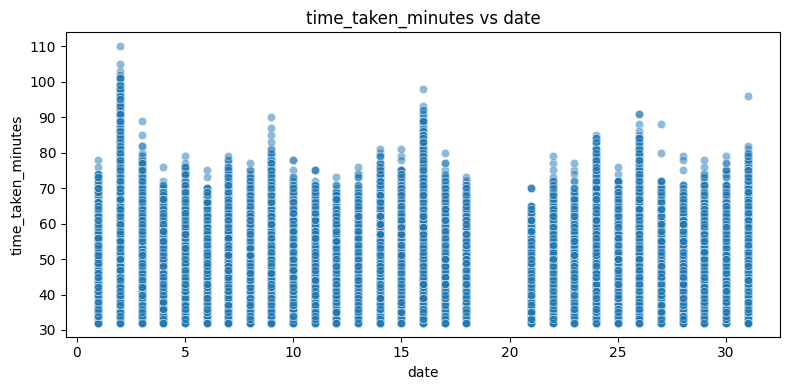

 3.2.1 Scatter plots for important numerical and categorical features to observe how they relate to time_taken - Countplot of time_taken_minutes
Plot saved to PDF!


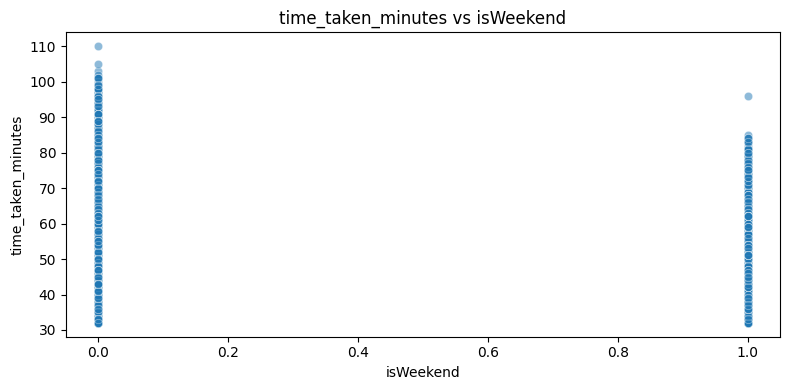

 3.2.1 Scatter plots for important numerical and categorical features to observe how they relate to time_taken - Countplot of time_taken_minutes
Plot saved to PDF!


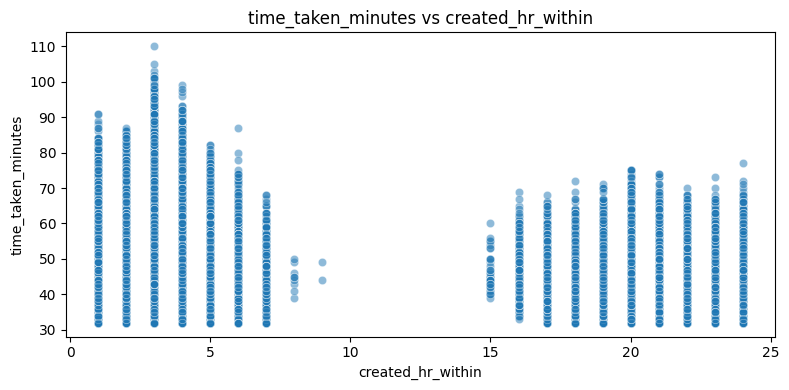

 3.2.1 Scatter plots for important numerical and categorical features to observe how they relate to time_taken - Countplot of time_taken_minutes
Plot saved to PDF!


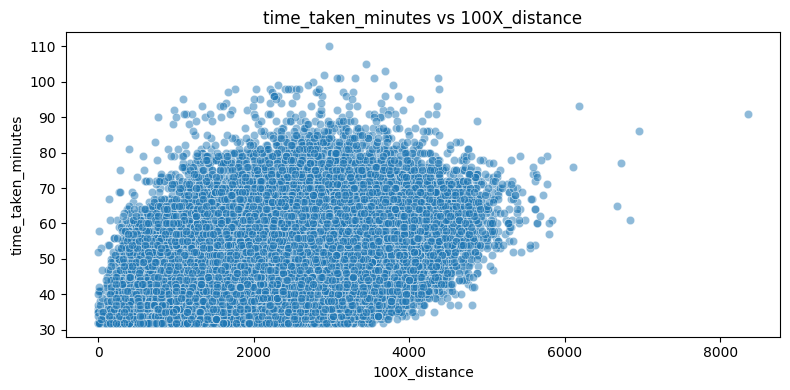

In [27]:
bivariate_plot(df_del_time,'time_taken_minutes', "3.2.1 Scatter plots for important numerical and categorical features to observe how they relate to time_taken")

In [28]:
# Show the distribution of time_taken for different hours

import matplotlib.pyplot as plt
import seaborn as sns
def target_distribution_analysis(df,  comment):
    # Group by both created_hr_within and isWeekend
    avg_time_per_hour = df_del_time.groupby(['created_hr_within', 'isWeekend'])['time_taken_minutes'].mean().reset_index()
    
    # Sort by hour (optional, just for better x-axis)
    avg_time_per_hour = avg_time_per_hour.sort_values('created_hr_within')
    
    # Plot
    plt.figure(figsize=(14, 6))
    sns.lineplot(x='created_hr_within', y='time_taken_minutes', hue='isWeekend', data=avg_time_per_hour, marker='o')
    plt.title('Average Time Taken per Hour of the Day (Weekend vs Weekday)', fontsize=16)
    plt.xlabel('Hour of Order (created_hr_within)', fontsize=14)
    plt.ylabel('Average Time Taken (minutes)', fontsize=14)
    plt.xticks(range(1, 25))  # 1 to 24
    plt.grid(True)
        
    # Save plot to PDF
    save_plot_to_pdf(f"{comment} ")
    plt.show()

 3.2.1 Show the distribution of time_taken for different hours 
Plot saved to PDF!


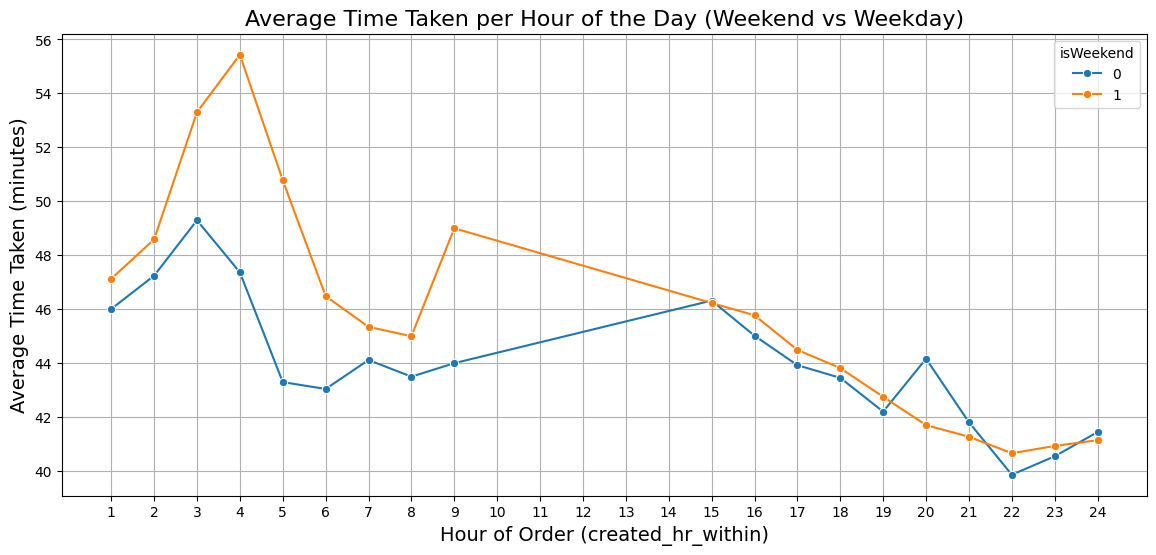

In [29]:
target_distribution_analysis(df_del_time, "3.2.1 Show the distribution of time_taken for different hours")

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [30]:
# Plot the heatmap of the correlation matrix
def heatmap_plot(df,  comment):
    plt.figure(figsize = (20, 14))
    sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
    
    # Save plot to PDF
    save_plot_to_pdf(f"{comment} ")
    plt.show()


 3.3.1 Plot a heatmap to display correlations 
Plot saved to PDF!


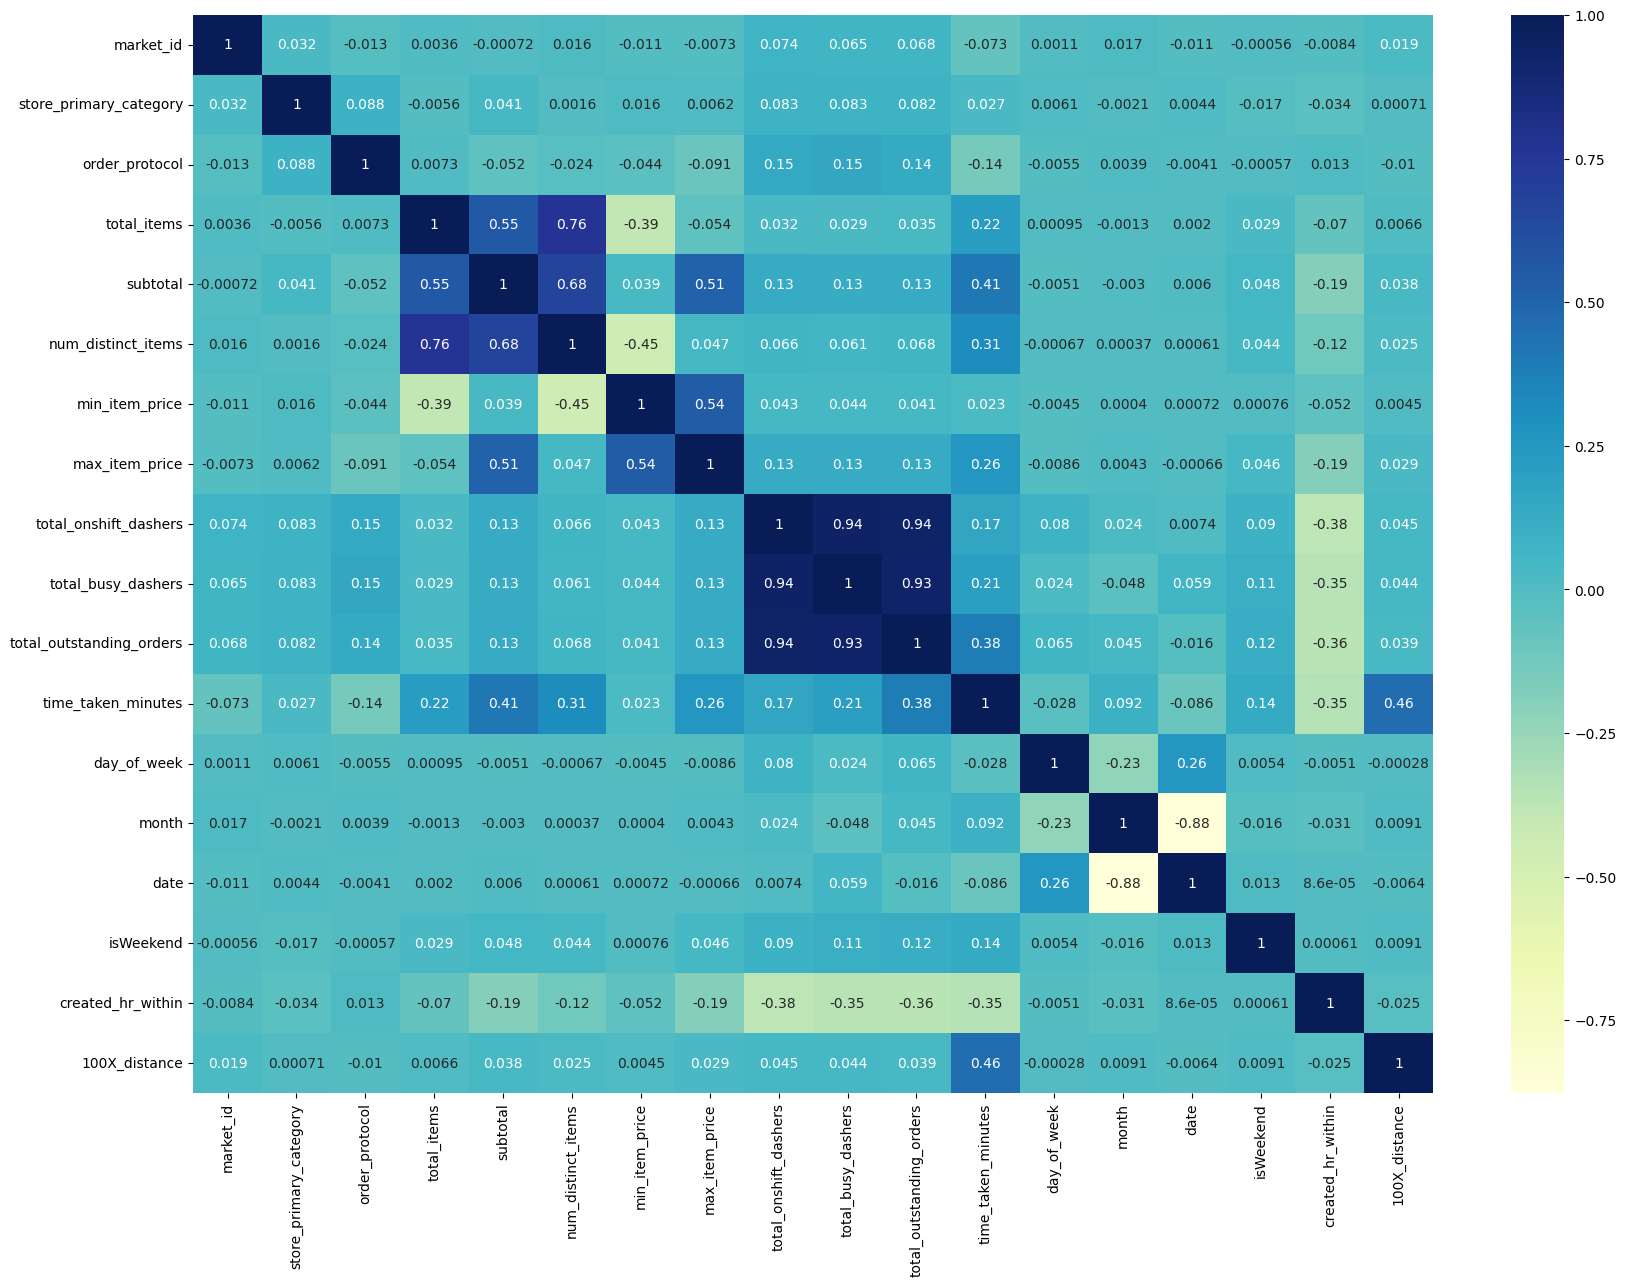

In [31]:
heatmap_plot(df_del_time, "3.3.1 Plot a heatmap to display correlations")

In [32]:
# Calculate the correlation matrix
correlation_matrix = df_del_time.corr()

# Get the correlation values of 'time_taken_minutes' with all other columns
time_taken_corr = correlation_matrix['time_taken_minutes']

# Sort the correlations in descending order
sorted_corr = time_taken_corr.sort_values(ascending=False)

# Print the sorted correlations
print(sorted_corr)



time_taken_minutes          1.000000
100X_distance               0.460172
subtotal                    0.413267
total_outstanding_orders    0.384999
num_distinct_items          0.312055
max_item_price              0.255167
total_items                 0.224856
total_busy_dashers          0.206045
total_onshift_dashers       0.171015
isWeekend                   0.136414
month                       0.091516
store_primary_category      0.026973
min_item_price              0.022753
day_of_week                -0.028466
market_id                  -0.073016
date                       -0.085667
order_protocol             -0.136755
created_hr_within          -0.346366
Name: time_taken_minutes, dtype: float64


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [33]:
# Drop 3-5 weakly correlated columns from training dataset
#drop_cols_from_train_data = ['store_primary_category','min_item_price','day_of_week','market_id','date','order_protocol']
drop_cols_from_train_data = ['store_primary_category','min_item_price','date']


# dropping and updating the data frame

#df_del_time = df_del_time.drop(columns=drop_columns)
df_del_time_encoded.drop(columns=drop_cols_from_train_data, inplace=True)

X_train.drop(columns=drop_cols_from_train_data, inplace=True)
X_test.drop(columns=drop_cols_from_train_data, inplace=True)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

#### Box Plot for Input

In [38]:
# Boxplot for time_taken

def box_plot (df, comment,  box_plot_cols):
        for col in box_plot_cols:
            plt.figure(figsize=(12, 4))
            sns.boxplot(y=df[col])
            plt.title(f'Boxplot of {col}')
            plt.tight_layout()
            save_plot_to_pdf(f"{comment} - KDE Plot of {col}")
            plt.show()
box_plot_cols = ['100X_distance','subtotal','total_outstanding_orders','num_distinct_items','max_item_price','total_items',
                 'total_busy_dashers','total_onshift_dashers']

 3.4.1 Visualise potential outliers for the input numerical features using boxplots - KDE Plot of 100X_distance
Plot saved to PDF!


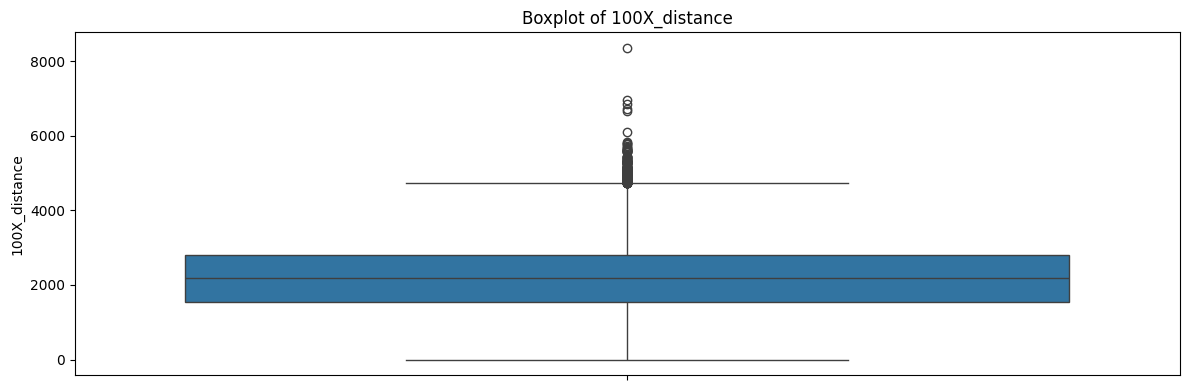

 3.4.1 Visualise potential outliers for the input numerical features using boxplots - KDE Plot of subtotal
Plot saved to PDF!


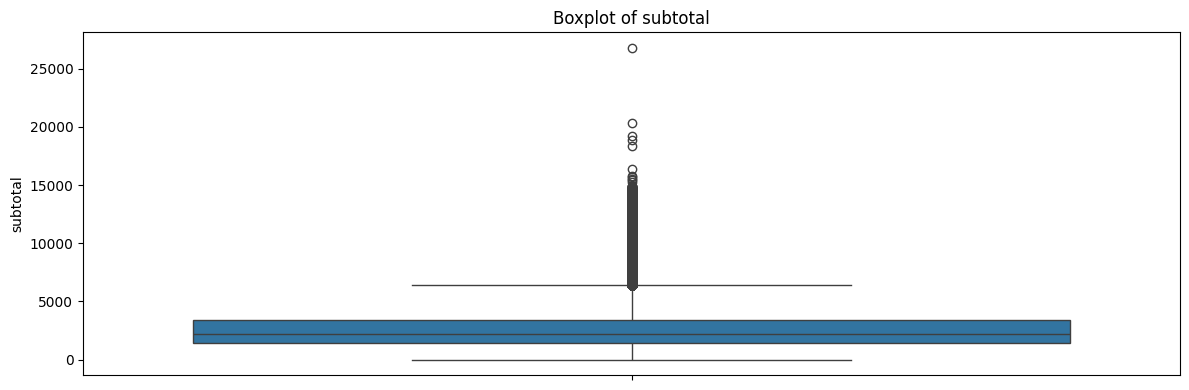

 3.4.1 Visualise potential outliers for the input numerical features using boxplots - KDE Plot of total_outstanding_orders
Plot saved to PDF!


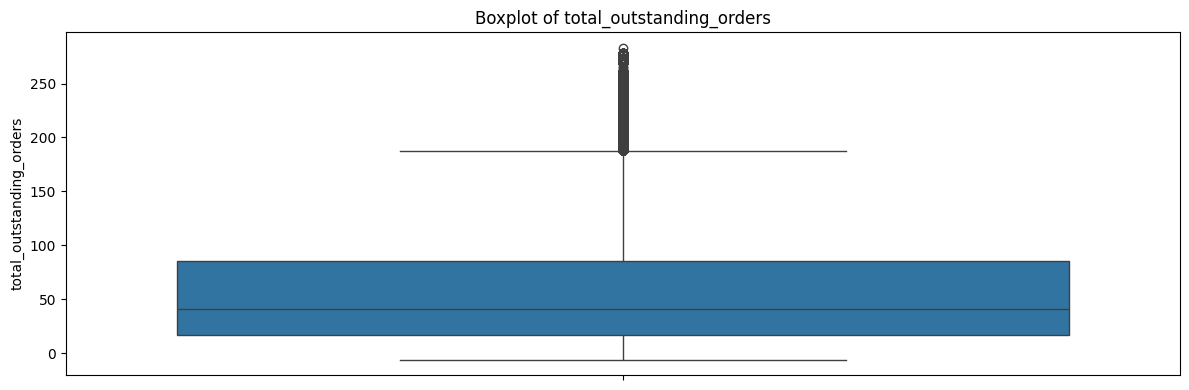

 3.4.1 Visualise potential outliers for the input numerical features using boxplots - KDE Plot of num_distinct_items
Plot saved to PDF!


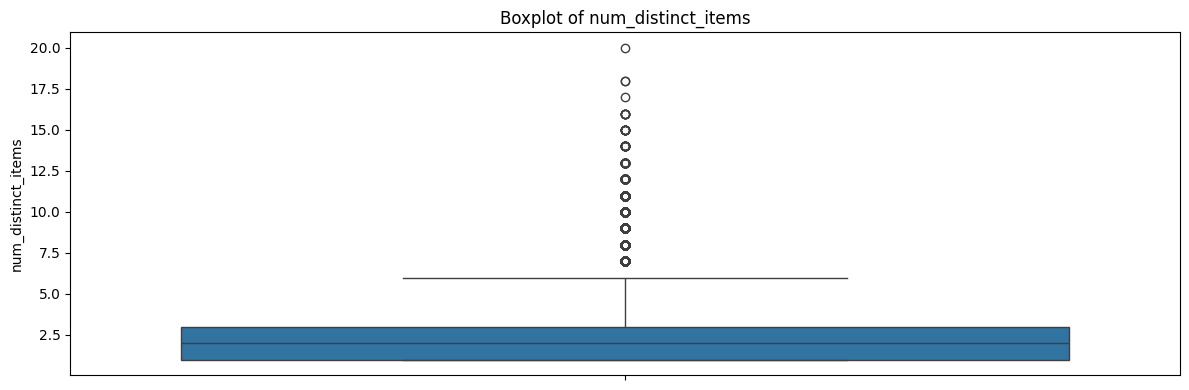

 3.4.1 Visualise potential outliers for the input numerical features using boxplots - KDE Plot of max_item_price
Plot saved to PDF!


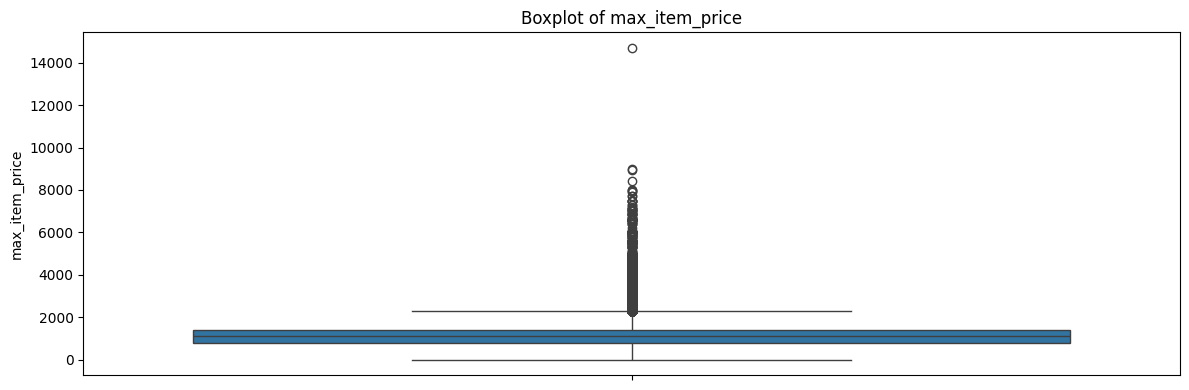

 3.4.1 Visualise potential outliers for the input numerical features using boxplots - KDE Plot of total_items
Plot saved to PDF!


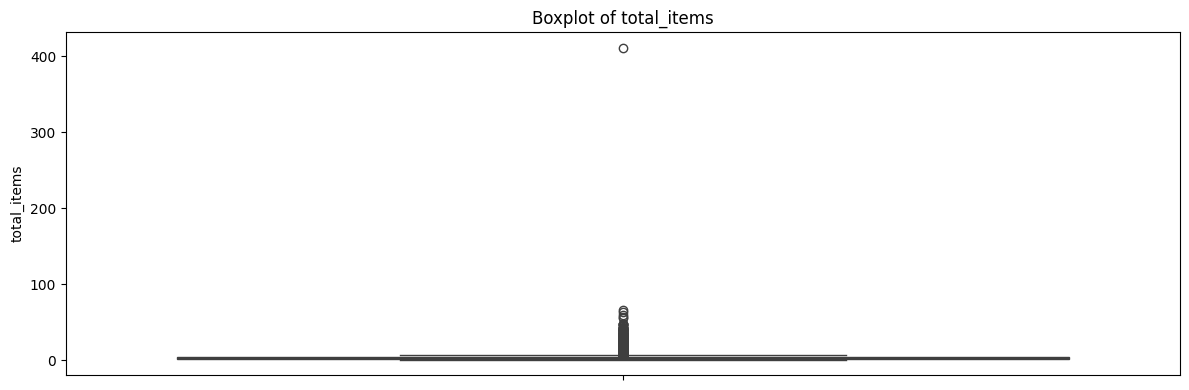

 3.4.1 Visualise potential outliers for the input numerical features using boxplots - KDE Plot of total_busy_dashers
Plot saved to PDF!


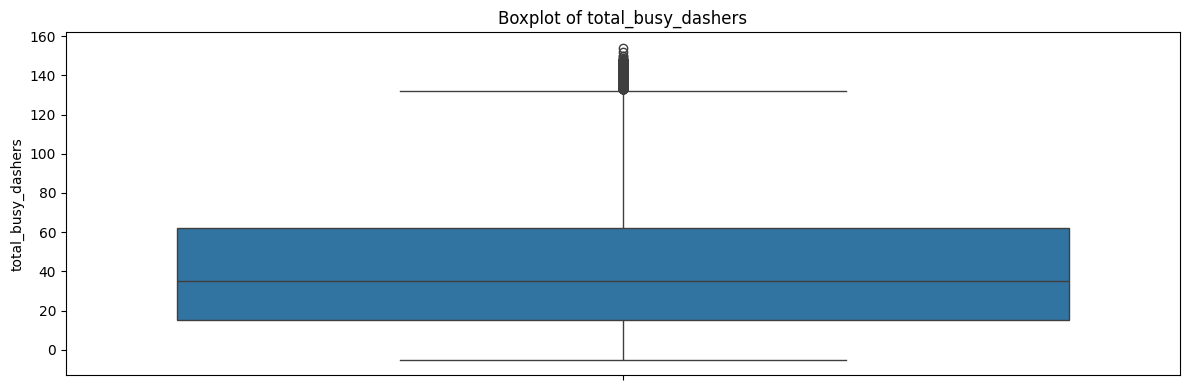

 3.4.1 Visualise potential outliers for the input numerical features using boxplots - KDE Plot of total_onshift_dashers
Plot saved to PDF!


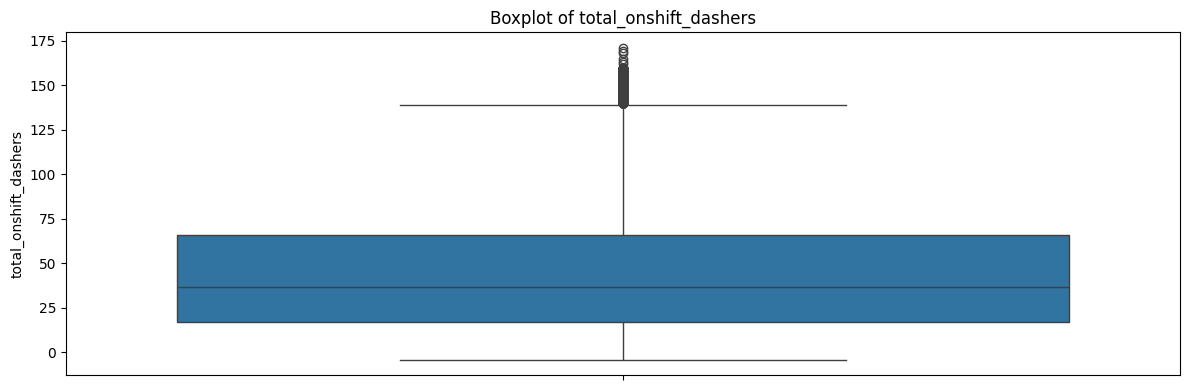

In [39]:
box_plot(X_train,"3.4.1 Visualise potential outliers for the input numerical features using boxplots",box_plot_cols)

#### Box Plot for Target

In [40]:
def show_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"Number of outliers in {column}: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")
    
    # Visualize outliers
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column} showing outliers')
    
    save_plot_to_pdf(" 3.1.3 Showing outliers in Box Plot Only")
    plt.show()

Number of outliers in time_taken_minutes: 1417
Percentage of outliers: 1.01%
  3.1.3 Showing outliers in Box Plot Only
Plot saved to PDF!


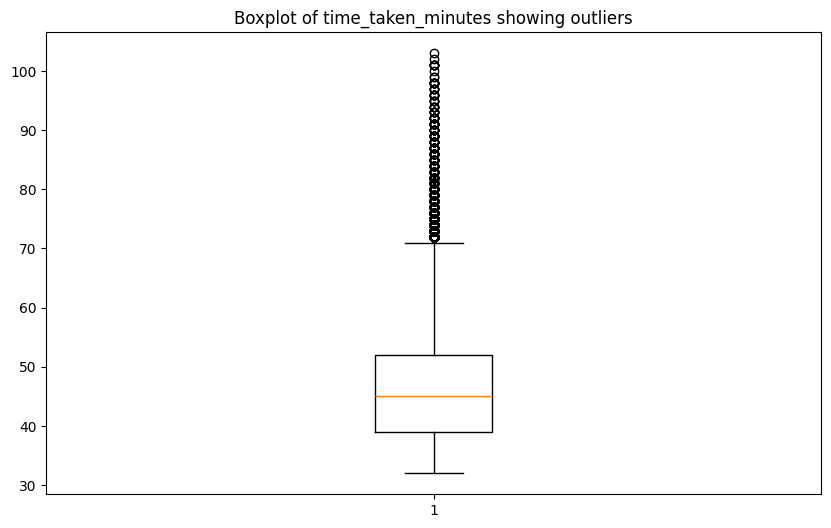

In [42]:
show_outliers(y_train, "time_taken_minutes")

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [43]:
# Handle outliers
def show_all_outliers(df):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=['number'])
    
    # Compute Q1, Q3, and IQR
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)
    
    # Count of outliers per column
    outlier_counts = outliers.sum()
    
    # Calculate percentage of outliers per column
    outlier_percentage = (outlier_counts / len(df)) * 100

    # Compute skewness for each column
    skewness_values = numeric_cols.skew()
    
    # Combine count and percentage into a DataFrame
    outlier_summary = pd.DataFrame({
        "Outlier Count": outlier_counts,
        "Outlier Percentage": outlier_percentage,
        "Skewness": skewness_values
    }).sort_values(by="Outlier Percentage", ascending=False)
    
    print("Outlier summary per column:\n", outlier_summary)
    
    # View rows containing outliers
    df_outliers = df[outliers.any(axis=1)]
    return df_outliers.head() #, outlier_summary


In [45]:
show_all_outliers(X_train)

Outlier summary per column:
                           Outlier Count  Outlier Percentage   Skewness
order_protocol_5                  33175           23.591782   1.244008
day_of_week_6                     24701           17.565655   1.704722
day_of_week_5                     20072           14.273828   2.042651
day_of_week_1                     19256           13.693545   2.112219
day_of_week_4                     18101           12.872188   2.217325
day_of_week_3                     17424           12.390752   2.282998
day_of_week_2                     17186           12.221503   2.306869
market_id_3                       16897           12.015986   2.336436
order_protocol_2                  16792           11.941317   2.347341
order_protocol_4                  13718            9.755300   2.712765
market_id_5                       13714            9.752455   2.713310
total_items                        6757            4.805114  26.998817
subtotal                           6547         

total_items  subtotal  num_distinct_items  max_item_price  \
42111             1      1350                   1            1350   
58452             5      4285                   5             900   
20644             6      7880                   3            1450   
79735             3      3660                   3            1450   
167933            5      8575                   5            2625   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
42111                      23                  20                        19   
58452                     112                 100                       207   
20644                      80                  79                       115   
79735                     127                 106                       173   
167933                     44                  44                        61   

        month  created_hr_within  100X_distance  ...  order_protocol_5  \
42111       2                 21            960  ...                 0   
58452       1                  3           3456  ...                 1   
20644       1                  4           3492  ...                 0   
79735       1                  3           2576  ...                 0   
167933      1                  3           1772  ...                 1   

        order_protocol_6  order_protocol_7  day_of_week_1  day_of_week_2  \
42111                  0                 0              1              0   
58452                  0                 0              0              0   
20644                  0                 0              0              0   
79735                  0                 0              0              0   
167933                 0                 0              0              0   

        day_of_week_3  day_of_week_4  day_of_week_5  day_of_week_6  \
42111               0              0              0              0   
58452               0              0              0              1   
20644               0              0              1              0   
79735               0              0              0              1   
167933              0              1              0              0   

        isWeekend_1  
42111             0  
58452             1  
20644             0  
79735             1  
167933            0  

[5 rows x 28 columns]

##### removing rows less than 5% outlier (IQR)

In [51]:
import pandas as pd

def drop_or_clip_outliers(df, threshold=5, exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []
        
    # Select numeric columns, excluding specified ones
    numeric_cols = [col for col in df.select_dtypes(include=['number']).columns if col not in exclude_cols]
    df_numeric = df[numeric_cols]

    # Compute IQR
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df_numeric < lower_bound) | (df_numeric > upper_bound)

    # Compute outlier percentage before removal
    outlier_percent_before = (outliers.sum() / len(df)) * 100

    # Decide which columns to drop rows for and which to clip
    cols_to_drop_outliers = outlier_percent_before[outlier_percent_before < threshold].index.tolist()
    cols_to_clip = outlier_percent_before[outlier_percent_before >= threshold].index.tolist()

    df_processed = df.copy()

    # --- Drop rows with outliers in low-outlier columns ---
    if cols_to_drop_outliers:
        drop_mask = outliers[cols_to_drop_outliers].any(axis=1)
        df_processed = df_processed[~drop_mask].copy()

    # --- Clip values in high-outlier columns ---
    for col in cols_to_clip:
        df_processed[col] = df_processed[col].clip(lower=lower_bound[col], upper=upper_bound[col])

    # Recalculate outlier percentage and skewness after cleaning
    df_numeric_filtered = df_processed[numeric_cols]
    outliers_after = (df_numeric_filtered < lower_bound) | (df_numeric_filtered > upper_bound)
    outlier_percent_after = (outliers_after.sum() / len(df_processed)) * 100
    skewness_after = df_numeric_filtered.skew()

    # Create and print summary
    summary_df = pd.DataFrame({
        "Outlier % Before": outlier_percent_before,
        "Rows Before": len(df),
        "Outlier % After": outlier_percent_after,
        "Rows After": len(df_processed),
        "Skewness After": skewness_after
    })

    print("\nOutlier Summary (Row Drop + Clipping):\n")
    print(summary_df.to_string())

    return df_processed


In [52]:
# Apply function and create new DF df_non_negative_drop_outlier
df_train_no_outlier = drop_or_clip_outliers(X_train, threshold=5, exclude_cols=None)


Outlier Summary (Row Drop + Clipping):

                          Outlier % Before  Rows Before  Outlier % After  Rows After  Skewness After
total_items                       4.805114       140621              0.0      120214        0.819325
subtotal                          4.655777       140621              0.0      120214        0.893974
num_distinct_items                2.968973       140621              0.0      120214        0.754511
max_item_price                    3.970957       140621              0.0      120214        0.370608
total_onshift_dashers             0.688375       140621              0.0      120214        0.816234
total_busy_dashers                0.338499       140621              0.0      120214        0.725047
total_outstanding_orders          2.936261       140621              0.0      120214        1.019342
month                             0.000000       140621              0.0      120214       -0.615102
created_hr_within                 0.000000       1

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [53]:
# Import libraries
import statsmodels.api as sm  
from sklearn.preprocessing import StandardScaler


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [54]:
X_train.head()

total_items  subtotal  num_distinct_items  max_item_price  \
42111             1      1350                   1            1350   
58452             5      4285                   5             900   
20644             6      7880                   3            1450   
79735             3      3660                   3            1450   
167933            5      8575                   5            2625   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
42111                      23                  20                        19   
58452                     112                 100                       207   
20644                      80                  79                       115   
79735                     127                 106                       173   
167933                     44                  44                        61   

        month  created_hr_within  100X_distance  ...  order_protocol_5  \
42111       2                 21            960  ...                 0   
58452       1                  3           3456  ...                 1   
20644       1                  4           3492  ...                 0   
79735       1                  3           2576  ...                 0   
167933      1                  3           1772  ...                 1   

        order_protocol_6  order_protocol_7  day_of_week_1  day_of_week_2  \
42111                  0                 0              1              0   
58452                  0                 0              0              0   
20644                  0                 0              0              0   
79735                  0                 0              0              0   
167933                 0                 0              0              0   

        day_of_week_3  day_of_week_4  day_of_week_5  day_of_week_6  \
42111               0              0              0              0   
58452               0              0              0              1   
20644               0              0              1              0   
79735               0              0              0              1   
167933              0              1              0              0   

        isWeekend_1  
42111             0  
58452             1  
20644             0  
79735             1  
167933            0  

[5 rows x 28 columns]

In [55]:
# Apply scaling to the numerical columns
scaler = StandardScaler()

# 1. Fit scaler on numeric columns only
scaler.fit(X_train)

# 2. Transform the numeric columns for train and test separately
#X_train_df = scaler.transform(X_train)
#X_test_df = scaler.transform(X_test)

X_train_df = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_df = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


In [56]:
X_train_df

total_items  subtotal  num_distinct_items  max_item_price  \
42111     -0.810814 -0.736089           -1.030286        0.335523   
58452      0.660479  0.867677            1.432233       -0.462162   
20644      1.028302  2.832087            0.200973        0.512787   
79735     -0.075168  0.526160            0.200973        0.512787   
167933     0.660479  3.211854            1.432233        2.595632   
...             ...       ...                 ...             ...   
82270     -0.810814 -0.984714           -1.030286       -0.471025   
65615      1.396125  0.654024            2.047862        0.106854   
77655      5.074357 -1.228968            0.200973       -1.545242   
56088     -0.442991  0.165517           -0.414656        0.601419   
38408     -0.442991  0.575338           -0.414656        1.576367   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
42111               -0.635108           -0.679902                 -0.744829   
58452                1.940426            1.809014                  2.824571   
20644                1.014392            1.155673                  1.077843   
79735                2.374505            1.995683                  2.179041   
167933              -0.027397            0.066773                  0.052590   
...                       ...                 ...                       ...   
82270               -1.184941           -1.239909                 -1.086581   
65615                0.551374            0.564556                  0.109548   
77655               -0.172090            0.035661                 -0.156258   
56088               -0.027397            0.035661                  0.090562   
38408               -0.085275            0.533444                 -0.422064   

           month  created_hr_within  100X_distance  ...  order_protocol_5  \
42111   0.736814           1.328434      -1.397727  ...         -0.555662   
58452  -1.357194          -0.746049       1.454125  ...          1.799657   
20644  -1.357194          -0.630800       1.495257  ...         -0.555662   
79735  -1.357194          -0.746049       0.448664  ...         -0.555662   
167933 -1.357194          -0.746049      -0.469961  ...          1.799657   
...          ...                ...            ...  ...               ...   
82270   0.736814           1.328434      -0.648202  ...         -0.555662   
65615   0.736814           1.674181       0.092183  ...          1.799657   
77655   0.736814          -0.400302      -0.136331  ...          1.799657   
56088   0.736814           1.213185      -0.022074  ...         -0.555662   
38408  -1.357194          -0.976548       0.617764  ...         -0.555662   

        order_protocol_6  order_protocol_7  day_of_week_1  day_of_week_2  \
42111          -0.061508         -0.010667       2.510520      -0.373137   
58452          -0.061508         -0.010667      -0.398324      -0.373137   
20644          -0.061508         -0.010667      -0.398324      -0.373137   
79735          -0.061508         -0.010667      -0.398324      -0.373137   
167933         -0.061508         -0.010667      -0.398324      -0.373137   
...                  ...               ...            ...            ...   
82270          -0.061508         -0.010667      -0.398324      -0.373137   
65615          -0.061508         -0.010667      -0.398324      -0.373137   
77655          -0.061508         -0.010667      -0.398324       2.679981   
56088          -0.061508         -0.010667      -0.398324      -0.373137   
38408          -0.061508         -0.010667      -0.398324       2.679981   

        day_of_week_3  day_of_week_4  day_of_week_5  day_of_week_6  \
42111       -0.376074      -0.384369      -0.408050      -0.461613   
58452       -0.376074      -0.384369      -0.408050       2.166317   
20644       -0.376074      -0.384369       2.450679      -0.461613   
79735       -0.376074      -0.384369      -0.408050       2.166317   
167933      -0.376074       2.601670      

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [57]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [58]:
# Create/Initialise the model
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train_df, y_train)

#Model is LR and selecting Feature=10
rfe_col_selector = RFE(estimator=lm, n_features_to_select=10) 

rfe_col_selector = rfe_col_selector.fit(X_train_df, y_train)


In [59]:
#list(zip(X_train_df.columns,rfe_col_selector.support_,rfe_col_selector.ranking_))

In [60]:
rfe_col_selector.support_

array([False,  True, False, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [61]:
# Taking only those columns where it is True
selected_feature = X_train_df.columns[rfe_col_selector.support_]

print(selected_feature)
X_train = X_train_df[selected_feature]
X_test = X_test_df[selected_feature]

print (X_train.shape)
print (X_test.shape)

Index(['subtotal', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'created_hr_within', '100X_distance',
       'market_id_2', 'market_id_3', 'market_id_4', 'market_id_5'],
      dtype='object')
(140621, 10)
(35156, 10)


In [62]:
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

In [63]:
# Train the model using the training data
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model


print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:     time_taken_minutes   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                 1.079e+05
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:06:52   Log-Likelihood:            -3.6161e+05
No. Observations:              140621   AIC:                         7.232e+05
Df Residuals:                  140610   BIC:                         7.233e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2      total_onshift_dashers  12.20
3         total_busy_dashers  11.50
4   total_outstanding_orders   9.96
7                market_id_2   2.18
9                market_id_4   2.04
8                market_id_3   1.38
10               market_id_5   1.33
5          created_hr_within   1.27
1                   subtotal   1.05
6              100X_distance   1.01
0                      const   1.00

In [65]:
X_train_1 = X_train.drop(["total_onshift_dashers"], axis = 1)
X_test_1 = X_test.drop(["total_onshift_dashers"], axis = 1)

In [66]:
X_train_1 = sm.add_constant(X_train_1)
lm = sm.OLS(y_train,X_train_1).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:     time_taken_minutes   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 4.687e+04
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:06:54   Log-Likelihood:            -4.1601e+05
No. Observations:              140621   AIC:                         8.320e+05
Df Residuals:                  140611   BIC:                         8.321e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [67]:
vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2        total_busy_dashers  8.32
3  total_outstanding_orders  7.85
6               market_id_2  2.12
8               market_id_4  2.02
7               market_id_3  1.38
9               market_id_5  1.32
4         created_hr_within  1.25
1                  subtotal  1.05
5             100X_distance  1.01
0                     const  1.00

In [68]:
X_train_2 = X_train_1.drop(["total_busy_dashers"], axis = 1)
X_test_2 = X_test_1.drop(["total_busy_dashers"], axis = 1)

In [69]:
X_train_2 = sm.add_constant(X_train_2)
lm = sm.OLS(y_train,X_train_2).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:     time_taken_minutes   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                 2.617e+04
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:06:55   Log-Likelihood:            -4.4937e+05
No. Observations:              140621   AIC:                         8.988e+05
Df Residuals:                  140612   BIC:                         8.989e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [70]:
vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5               market_id_2  2.03
7               market_id_4  1.95
2  total_outstanding_orders  1.67
6               market_id_3  1.38
8               market_id_5  1.32
3         created_hr_within  1.24
1                  subtotal  1.05
4             100X_distance  1.01
0                     const  1.00

In [71]:
# Make predictions


In [72]:
# Find results for evaluation metrics



Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [73]:
# Loop through the number of features and test the model



In [74]:
# Build the final model with selected number of features



## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [75]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram



[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [76]:
# Compare the scaled vs unscaled features used in the final model



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [77]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>